In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

In [52]:
table = pd.read_csv('IA2-train.csv')

# initialize w and avg_w
w = pd.Series(1, index=list(range(197)), dtype='float32')
avg_w = pd.Series(1, index=list(range(197)), dtype='float32')

xi = table.iloc[:,:197]

# set hyperparameter
maxiter = 100
s = 1

# accuracy of training with w
predict_acc_list = []

# accuracy of training with avg_w
predict_avg_acc_list = []

# accuracy of validation with w
predict_val_acc_list = []

# accuracy of validation with avg_w
predict_val_avg_acc_list = []

# normalizaion (age, annual_premium, vintage)
mean = []
std = []

mean.append(xi.loc[:,"Age"].mean())
std.append(xi.loc[:,"Age"].std())

mean.append(xi.loc[:,"Annual_Premium"].mean())
std.append(xi.loc[:,"Annual_Premium"].std())

mean.append(xi.loc[:,"Vintage"].mean())
std.append(xi.loc[:,"Vintage"].std())

xi.loc[:,"Age"] = (xi.loc[:,"Age"] - xi.loc[:,"Age"].mean()) / xi.loc[:,"Age"].std()
xi.loc[:,"Annual_Premium"] = (xi.loc[:,"Annual_Premium"] - xi.loc[:,"Annual_Premium"].mean()) / xi.loc[:,"Annual_Premium"].std()
xi.loc[:,"Vintage"] = (xi.loc[:,"Vintage"] - xi.loc[:,"Vintage"].mean()) / xi.loc[:,"Vintage"].std()

# result y
y = table.loc[:,['Response']]
y = y.replace(0,-1)
yn = y['Response'].to_numpy()
y_result = y['Response'].values.tolist()


# validation dataset preprocessing
table2 = pd.read_csv('IA2-dev.csv')

val_xi = table2.iloc[:,:197]

val_xi.loc[:,"Age"] = (val_xi.loc[:,"Age"] - mean.pop(0)) / std.pop(0)
val_xi.loc[:,"Annual_Premium"] = (val_xi.loc[:,"Annual_Premium"] - mean.pop(0)) / std.pop(0)
val_xi.loc[:,"Vintage"] = (val_xi.loc[:,"Vintage"] - mean.pop(0)) / std.pop(0)

# result val_y
val_y = table2.loc[:,['Response']]
val_y = val_y.replace(0,-1)
val_yn = val_y['Response'].to_numpy()
val_y_result = val_y['Response'].values.tolist()

for itr in range(maxiter):
    for ex in range(xi.shape[0]):
        if yn[ex] * np.sum(xi.iloc[ex,:].to_numpy() * w.to_numpy()) <= 0:
            w += yn[ex]*xi.iloc[ex,:].to_numpy()
        avg_w = (s*avg_w + w) / (s+1)
        s += 1

    print("w : ",w)
    print("avg_w: ",avg_w)
    
    # calculate accuracy of training with w
    data = xi.to_numpy() * w.to_numpy()
    
    predict_w = []
    for _ in np.sum(data,axis=1):
        if _ >= 0:
            predict_w.append(1)
        else:
            predict_w.append(-1)

    count = 0
    for i in range(xi.shape[0]):
        if predict_w[i] == y_result[i]:
            count += 1

    predict_acc = count / xi.shape[0]


    # calculate accuracy of training with avg_w

    data2 = xi.to_numpy() * avg_w.to_numpy()

    predict_avg_w = []
    for _ in np.sum(data2,axis=1):
        if _ >= 0:
            predict_avg_w.append(1)
        else:
            predict_avg_w.append(-1)

    count1 = 0
    for i in range(xi.shape[0]):
        if predict_avg_w[i] == y_result[i]:
            count1 += 1

    predict_avg_acc = count1 / xi.shape[0]

    print("\n\n========", itr,"th predicted training accuracy========")
    print("w perceptron acc: ",predict_acc)   
    print("w avg perceptron acc: ",predict_avg_acc)
    predict_acc_list.append(predict_acc) 
    predict_avg_acc_list.append(predict_avg_acc)

    # validation
    data3 = val_xi.to_numpy() * w.to_numpy()

    predict_val_w = []
    i = 0
    for _ in np.sum(data3,axis=1):
        if _ > 0:
            predict_val_w.append(1)
        else:
            predict_val_w.append(-1)
        i += 1

    count3 = 0
    for i in range(val_xi.shape[0]):
        if predict_val_w[i] == val_y_result[i]:
            count3 += 1

    predict_val_acc = count3 / val_xi.shape[0]

    # calculate accuracy of validation with avg_w
    data4 = val_xi.to_numpy() * avg_w.to_numpy()
    
    predict_val_avg_w = []
    for _ in np.sum(data4,axis=1):
        if _ >= 0:
            predict_val_avg_w.append(1)
        else:
            predict_val_avg_w.append(-1)

    count4 = 0
    for i in range(val_xi.shape[0]):
        if predict_val_avg_w[i] == val_y_result[i]:
            count4 += 1

    predict_val_avg_acc = count4 / val_xi.shape[0]


    print("\n\n========predicted validation accuracy========")
    print(predict_val_acc) 
    print(predict_val_avg_acc)
    predict_val_acc_list.append(predict_val_acc) 
    predict_val_avg_acc_list.append(predict_val_avg_acc)

    
    

print("predict_acc_list",predict_acc_list)
print("predict_avg_acc_list",predict_avg_acc_list)
print("predict_val_acc_list",predict_val_acc_list)
print("predict_val_avg_acc_list",predict_val_avg_acc_list)


w :  0     -7.000000
1      0.000000
2     -3.062354
3     -3.000000
4     -9.000000
         ...   
192    2.000000
193    1.000000
194    1.000000
195   -5.000000
196    3.000000
Length: 197, dtype: float64
avg_w:  0     -3.695384
1      0.347442
2     -1.263838
3     -2.208632
4     -8.194134
         ...   
192    3.355941
193    1.055991
194    1.000000
195   -4.419597
196    1.457924
Length: 197, dtype: float64


======== 0 th predicted training accuracy========
w perceptron acc:  0.614
w avg perceptron acc:  0.7986666666666666


========predicted validation accuracy========
0.6031
0.7923
w :  0      -7.000000
1       1.000000
2      -3.981738
3       1.000000
4     -10.000000
         ...    
192     3.000000
193     0.000000
194     1.000000
195    -7.000000
196     4.000000
Length: 197, dtype: float64
avg_w:  0     -4.790184
1      0.418048
2     -1.280661
3     -0.962753
4     -9.017332
         ...   
192    3.227814
193    0.636697
194    1.000000
195   -5.534372
196    1.7

w :  0     -10.00000
1      -1.00000
2      -1.95135
3       2.00000
4      -9.00000
         ...   
192     3.00000
193    -2.00000
194     1.00000
195    -5.00000
196     4.00000
Length: 197, dtype: float64
avg_w:  0      -7.449906
1       0.543605
2      -1.250978
3       2.247964
4     -10.110399
         ...    
192     3.677726
193    -1.266253
194     1.000000
195    -5.408218
196     2.420806
Length: 197, dtype: float64


======== 14 th predicted training accuracy========
w perceptron acc:  0.6393333333333333
w avg perceptron acc:  0.8001666666666667


========predicted validation accuracy========
0.6171
0.7901
w :  0      -9.000000
1      -1.000000
2      -2.911033
3       3.000000
4     -11.000000
         ...    
192     2.000000
193    -2.000000
194     1.000000
195    -5.000000
196     4.000000
Length: 197, dtype: float64
avg_w:  0      -7.512713
1       0.540109
2      -1.249402
3       2.327955
4     -10.079603
         ...    
192     3.682305
193    -1.339413
194     1

w :  0      -9.000000
1       1.000000
2      -4.042582
3       2.000000
4     -10.000000
         ...    
192     4.000000
193    -1.000000
194     1.000000
195    -6.000000
196     5.000000
Length: 197, dtype: float64
avg_w:  0      -7.840185
1       0.511026
2      -1.238343
3       2.658203
4     -10.174154
         ...    
192     3.896644
193    -1.551842
194     1.000000
195    -5.300728
196     2.500296
Length: 197, dtype: float64


======== 28 th predicted training accuracy========
w perceptron acc:  0.6576666666666666
w avg perceptron acc:  0.801


========predicted validation accuracy========
0.6356
0.7888
w :  0      -8.000000
1       1.000000
2      -3.022055
3       4.000000
4     -10.000000
         ...    
192     1.000000
193    -1.000000
194     1.000000
195    -5.000000
196     6.000000
Length: 197, dtype: float64
avg_w:  0      -7.851851
1       0.511914
2      -1.236609
3       2.678946
4     -10.175232
         ...    
192     3.925662
193    -1.535603
194     1.0

w :  0     -10.000000
1      -1.000000
2      -3.012177
3       3.000000
4      -9.000000
         ...    
192     4.000000
193    -2.000000
194     1.000000
195    -4.000000
196     5.000000
Length: 197, dtype: float64
avg_w:  0      -8.064558
1       0.518731
2      -1.249224
3       2.901380
4     -10.188426
         ...    
192     4.021000
193    -1.475269
194     1.000000
195    -5.329348
196     2.728017
Length: 197, dtype: float64


======== 42 th predicted training accuracy========
w perceptron acc:  0.6581666666666667
w avg perceptron acc:  0.8008333333333333


========predicted validation accuracy========
0.6382
0.7902
w :  0     -10.000000
1      -1.000000
2      -3.436508
3       3.000000
4     -10.000000
         ...    
192     2.000000
193    -1.000000
194     1.000000
195    -4.000000
196     5.000000
Length: 197, dtype: float64
avg_w:  0      -8.087810
1       0.527009
2      -1.246362
3       2.912993
4     -10.176613
         ...    
192     4.022932
193    -1.48277

w :  0      -8.00000
1       1.00000
2      -3.23422
3       2.00000
4     -10.00000
         ...   
192     2.00000
193    -1.00000
194     1.00000
195    -4.00000
196     4.00000
Length: 197, dtype: float64
avg_w:  0      -7.955310
1       0.554089
2      -1.250509
3       2.764325
4     -10.220301
         ...    
192     3.989520
193    -1.538083
194     1.000000
195    -5.354478
196     2.739083
Length: 197, dtype: float64


======== 56 th predicted training accuracy========
w perceptron acc:  0.6786666666666666
w avg perceptron acc:  0.8


========predicted validation accuracy========
0.6574
0.7902
w :  0      -9.000000
1       1.000000
2      -4.254747
3       0.000000
4     -11.000000
         ...    
192     3.000000
193    -2.000000
194     1.000000
195    -4.000000
196     3.000000
Length: 197, dtype: float64
avg_w:  0      -7.941960
1       0.552981
2      -1.250973
3       2.754834
4     -10.218632
         ...    
192     3.973721
193    -1.543266
194     1.000000
195    

w :  0      -9.000000
1       1.000000
2      -1.850206
3       2.000000
4     -10.000000
         ...    
192     1.000000
193    -1.000000
194     1.000000
195    -5.000000
196     3.000000
Length: 197, dtype: float64
avg_w:  0      -7.997089
1       0.552503
2      -1.259852
3       2.836482
4     -10.226281
         ...    
192     4.002077
193    -1.593567
194     1.000000
195    -5.285410
196     2.710750
Length: 197, dtype: float64


======== 70 th predicted training accuracy========
w perceptron acc:  0.6773333333333333
w avg perceptron acc:  0.7995


========predicted validation accuracy========
0.6613
0.7899
w :  0      -9.000000
1      -1.000000
2      -1.708763
3       3.000000
4     -11.000000
         ...    
192     2.000000
193    -2.000000
194     1.000000
195    -3.000000
196     4.000000
Length: 197, dtype: float64
avg_w:  0      -7.999632
1       0.552233
2      -1.258314
3       2.843095
4     -10.228958
         ...    
192     4.002528
193    -1.590600
194     1.

w :  0      -9.00000
1       0.00000
2      -3.19392
3       1.00000
4     -11.00000
         ...   
192     2.00000
193    -3.00000
194     1.00000
195    -5.00000
196     5.00000
Length: 197, dtype: float64
avg_w:  0      -7.988324
1       0.554142
2      -1.254005
3       2.833443
4     -10.254935
         ...    
192     3.987184
193    -1.611656
194     1.000000
195    -5.270809
196     2.634981
Length: 197, dtype: float64


======== 84 th predicted training accuracy========
w perceptron acc:  0.6445
w avg perceptron acc:  0.7988333333333333


========predicted validation accuracy========
0.6283
0.7896
w :  0      -9.000000
1       1.000000
2      -3.688973
3       1.000000
4     -10.000000
         ...    
192     2.000000
193    -3.000000
194     1.000000
195    -6.000000
196     4.000000
Length: 197, dtype: float64
avg_w:  0      -7.984295
1       0.551923
2      -1.252575
3       2.828431
4     -10.253903
         ...    
192     3.986735
193    -1.627545
194     1.000000
195 

w :  0     -10.000000
1       1.000000
2      -4.002282
3       2.000000
4      -9.000000
         ...    
192     4.000000
193    -3.000000
194     1.000000
195    -4.000000
196     4.000000
Length: 197, dtype: float64
avg_w:  0      -8.046729
1       0.554312
2      -1.252556
3       2.880305
4     -10.260814
         ...    
192     4.005943
193    -1.760029
194     1.000000
195    -5.270223
196     2.660935
Length: 197, dtype: float64


======== 98 th predicted training accuracy========
w perceptron acc:  0.6353333333333333
w avg perceptron acc:  0.7996666666666666


========predicted validation accuracy========
0.6167
0.7897
w :  0      -9.000000
1       0.000000
2      -2.062372
3       3.000000
4     -12.000000
         ...    
192     2.000000
193    -2.000000
194     1.000000
195    -6.000000
196     4.000000
Length: 197, dtype: float64
avg_w:  0      -8.050833
1       0.555874
2      -1.254475
3       2.886979
4     -10.253395
         ...    
192     4.008167
193    -1.76488

# result

<AxesSubplot:title={'center':'training and validation accuracy with w'}, xlabel='iteration', ylabel='accuracy'>

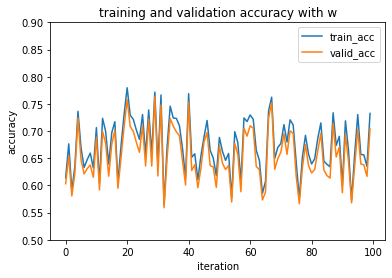

In [24]:
# training with w
data = [[0.614, 0.6765, 0.5905, 0.6355, 0.7363333333333333, 0.6691666666666667, 0.633, 0.6473333333333333, 0.6595, 0.6321666666666667, 0.7063333333333334, 0.6038333333333333, 0.7235, 0.6996666666666667, 0.6393333333333333, 0.6971666666666667, 0.7173333333333334, 0.6055, 0.6723333333333333, 0.7303333333333333, 0.7796666666666666, 0.7291666666666666, 0.7215, 0.7018333333333333, 0.6848333333333333, 0.7303333333333333, 0.6558333333333334, 0.7388333333333333, 0.6576666666666666, 0.7716666666666666, 0.637, 0.7663333333333333, 0.5643333333333334, 0.6716666666666666, 0.7458333333333333, 0.724, 0.7233333333333334, 0.71, 0.668, 0.6138333333333333, 0.7688333333333334, 0.6518333333333334, 0.6581666666666667, 0.6106666666666667, 0.6546666666666666, 0.6891666666666667, 0.7195, 0.6646666666666666, 0.6505, 0.6181666666666666, 0.6883333333333334, 0.6628333333333334, 0.6461666666666667, 0.6588333333333334, 0.5775, 0.6988333333333333, 0.6786666666666666, 0.6075, 0.7241666666666666, 0.7175, 0.7296666666666667, 0.7218333333333333, 0.6643333333333333, 0.6463333333333333, 0.5853333333333334, 0.6076666666666667, 0.7373333333333333, 0.7623333333333333, 0.6496666666666666, 0.6698333333333333, 0.6773333333333333, 0.7118333333333333, 0.6798333333333333, 0.7206666666666667, 0.7113333333333334, 0.6416666666666667, 0.5763333333333334, 0.6523333333333333, 0.6921666666666667, 0.6575, 0.6395, 0.649, 0.6865, 0.715, 0.6445, 0.6386666666666667, 0.6345, 0.7336666666666667, 0.6736666666666666, 0.6903333333333334, 0.6005, 0.7188333333333333, 0.6646666666666666, 0.5728333333333333, 0.6575, 0.7303333333333333, 0.657, 0.6561666666666667, 0.6353333333333333, 0.7325],[0.6031, 0.6542, 0.5808, 0.6226, 0.7242, 0.6473, 0.6211, 0.6308, 0.6376, 0.6151, 0.6888, 0.5918, 0.6991, 0.678, 0.6171, 0.6762, 0.7017, 0.5948, 0.6504, 0.7076, 0.758, 0.7084, 0.6993, 0.6793, 0.661, 0.7095, 0.6359, 0.7219, 0.6356, 0.7629, 0.6174, 0.7482, 0.5589, 0.6501, 0.7229, 0.7091, 0.6987, 0.6916, 0.646, 0.6007, 0.7534, 0.6274, 0.6382, 0.5958, 0.6315, 0.6801, 0.6974, 0.6366, 0.6341, 0.5963, 0.673, 0.6409, 0.6293, 0.6367, 0.5695, 0.6772, 0.6574, 0.5884, 0.7051, 0.6907, 0.7096, 0.7056, 0.6347, 0.6291, 0.5734, 0.5876, 0.7241, 0.7521, 0.6297, 0.6493, 0.6613, 0.695, 0.6572, 0.7005, 0.6956, 0.6161, 0.5663, 0.6325, 0.6754, 0.6365, 0.623, 0.6293, 0.6638, 0.6955, 0.6283, 0.618, 0.6136, 0.7142, 0.6523, 0.6705, 0.5867, 0.6938, 0.6443, 0.5679, 0.6351, 0.7032, 0.6395, 0.6379, 0.6167, 0.7049]]

numpy_array = np.array(data)
transpose = numpy_array.T

spar_data = pd.DataFrame(transpose,columns=['train_acc','valid_acc'])
spar_data.plot(title="training and validation accuracy with w",ylim=(0.5,0.9),xlabel="iteration",ylabel="accuracy")


<AxesSubplot:title={'center':'training and validation accuracy with avg_w'}, xlabel='iteration', ylabel='accuracy'>

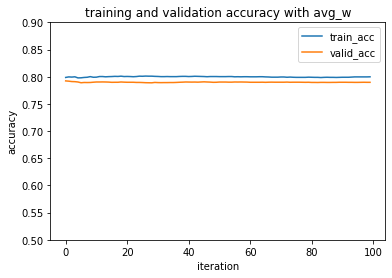

In [25]:
# training with w
data = [[0.7986666666666666, 0.7996666666666666, 0.7993333333333333, 0.7998333333333333, 0.7978333333333333, 0.798, 0.7986666666666666, 0.799, 0.8001666666666667, 0.799, 0.7991666666666667, 0.8003333333333333, 0.8003333333333333, 0.7998333333333333, 0.8001666666666667, 0.8003333333333333, 0.8006666666666666, 0.8005, 0.801, 0.8003333333333333, 0.8005, 0.8003333333333333, 0.8, 0.8003333333333333, 0.801, 0.8008333333333333, 0.8011666666666667, 0.801, 0.801, 0.8006666666666666, 0.8005, 0.8001666666666667, 0.8001666666666667, 0.8003333333333333, 0.8001666666666667, 0.8001666666666667, 0.8001666666666667, 0.8005, 0.8006666666666666, 0.8006666666666666, 0.8003333333333333, 0.8005, 0.8008333333333333, 0.8006666666666666, 0.8005, 0.8003333333333333, 0.8, 0.8003333333333333, 0.8003333333333333, 0.8003333333333333, 0.8001666666666667, 0.8001666666666667, 0.8001666666666667, 0.8003333333333333, 0.8003333333333333, 0.7998333333333333, 0.8, 0.7998333333333333, 0.8, 0.8, 0.7998333333333333, 0.7998333333333333, 0.7998333333333333, 0.8, 0.8, 0.7996666666666666, 0.7995, 0.7991666666666667, 0.7991666666666667, 0.7991666666666667, 0.7995, 0.7995, 0.799, 0.7993333333333333, 0.799, 0.7988333333333333, 0.7988333333333333, 0.7988333333333333, 0.7988333333333333, 0.7991666666666667, 0.799, 0.7988333333333333, 0.7988333333333333, 0.7985, 0.7988333333333333, 0.799, 0.7988333333333333, 0.7988333333333333, 0.7986666666666666, 0.7988333333333333, 0.799, 0.799, 0.799, 0.7993333333333333, 0.7996666666666666, 0.7996666666666666, 0.7996666666666666, 0.7996666666666666, 0.7996666666666666, 0.7998333333333333],[0.7923, 0.7918, 0.7911, 0.7909, 0.7903, 0.7889, 0.7894, 0.7893, 0.7894, 0.7899, 0.7903, 0.7903, 0.7904, 0.7903, 0.7901, 0.7897, 0.7898, 0.7898, 0.7903, 0.79, 0.7898, 0.7898, 0.7898, 0.7895, 0.7895, 0.7893, 0.789, 0.7889, 0.7888, 0.7895, 0.7892, 0.7891, 0.7892, 0.7892, 0.7893, 0.7893, 0.7895, 0.7898, 0.79, 0.7903, 0.7902, 0.7901, 0.7902, 0.79, 0.7903, 0.7906, 0.7903, 0.7901, 0.7897, 0.7898, 0.7902, 0.7902, 0.7902, 0.79, 0.79, 0.7903, 0.7902, 0.7903, 0.7902, 0.7901, 0.7898, 0.7898, 0.7898, 0.7898, 0.7899, 0.7897, 0.7899, 0.79, 0.7899, 0.7899, 0.7899, 0.7899, 0.7901, 0.7898, 0.7899, 0.7899, 0.7899, 0.7898, 0.7897, 0.7898, 0.7895, 0.7895, 0.7894, 0.7896, 0.7896, 0.7895, 0.7895, 0.7896, 0.7896, 0.7898, 0.7898, 0.7898, 0.7897, 0.7897, 0.7896, 0.7896, 0.7897, 0.7898, 0.7897, 0.7897]]

numpy_array = np.array(data)
transpose = numpy_array.T

spar_data = pd.DataFrame(transpose,columns=['train_acc','valid_acc'])
spar_data.plot(title="training and validation accuracy with avg_w",ylim=(0.5,0.9),xlabel="iteration",ylabel="accuracy")


<AxesSubplot:title={'center':'training with avg_w'}, xlabel='iter', ylabel='accuracy'>

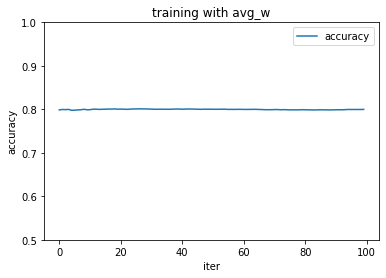

In [56]:
# training with avg_w
data = [0.7986666666666666, 0.7996666666666666, 0.7993333333333333, 0.7998333333333333, 0.7978333333333333, 0.798, 0.7986666666666666, 0.799, 0.8001666666666667, 0.799, 0.7991666666666667, 0.8003333333333333, 0.8003333333333333, 0.7998333333333333, 0.8001666666666667, 0.8003333333333333, 0.8006666666666666, 0.8005, 0.801, 0.8003333333333333, 0.8005, 0.8003333333333333, 0.8, 0.8003333333333333, 0.801, 0.8008333333333333, 0.8011666666666667, 0.801, 0.801, 0.8006666666666666, 0.8005, 0.8001666666666667, 0.8001666666666667, 0.8003333333333333, 0.8001666666666667, 0.8001666666666667, 0.8001666666666667, 0.8005, 0.8006666666666666, 0.8006666666666666, 0.8003333333333333, 0.8005, 0.8008333333333333, 0.8006666666666666, 0.8005, 0.8003333333333333, 0.8, 0.8003333333333333, 0.8003333333333333, 0.8003333333333333, 0.8001666666666667, 0.8001666666666667, 0.8001666666666667, 0.8003333333333333, 0.8003333333333333, 0.7998333333333333, 0.8, 0.7998333333333333, 0.8, 0.8, 0.7998333333333333, 0.7998333333333333, 0.7998333333333333, 0.8, 0.8, 0.7996666666666666, 0.7995, 0.7991666666666667, 0.7991666666666667, 0.7991666666666667, 0.7995, 0.7995, 0.799, 0.7993333333333333, 0.799, 0.7988333333333333, 0.7988333333333333, 0.7988333333333333, 0.7988333333333333, 0.7991666666666667, 0.799, 0.7988333333333333, 0.7988333333333333, 0.7985, 0.7988333333333333, 0.799, 0.7988333333333333, 0.7988333333333333, 0.7986666666666666, 0.7988333333333333, 0.799, 0.799, 0.799, 0.7993333333333333, 0.7996666666666666, 0.7996666666666666, 0.7996666666666666, 0.7996666666666666, 0.7996666666666666, 0.7998333333333333]

spar_data = pd.DataFrame(data,columns=['accuracy'])
spar_data.plot(title="training with avg_w",ylim=(0.5,1),xlabel="iter",ylabel="accuracy")

In [46]:
data = [0.7923, 0.7918, 0.7911, 0.7909, 0.7903, 0.7889, 0.7894, 0.7893, 0.7894, 0.7899, 0.7903, 0.7903, 0.7904, 0.7903, 0.7901, 0.7897, 0.7898, 0.7898, 0.7903, 0.79, 0.7898, 0.7898, 0.7898, 0.7895, 0.7895, 0.7893, 0.789, 0.7889, 0.7888, 0.7895, 0.7892, 0.7891, 0.7892, 0.7892, 0.7893, 0.7893, 0.7895, 0.7898, 0.79, 0.7903, 0.7902, 0.7901, 0.7902, 0.79, 0.7903, 0.7906, 0.7903, 0.7901, 0.7897, 0.7898, 0.7902, 0.7902, 0.7902, 0.79, 0.79, 0.7903, 0.7902, 0.7903, 0.7902, 0.7901, 0.7898, 0.7898, 0.7898, 0.7898, 0.7899, 0.7897, 0.7899, 0.79, 0.7899, 0.7899, 0.7899, 0.7899, 0.7901, 0.7898, 0.7899, 0.7899, 0.7899, 0.7898, 0.7897, 0.7898, 0.7895, 0.7895, 0.7894, 0.7896, 0.7896, 0.7895, 0.7895, 0.7896, 0.7896, 0.7898, 0.7898, 0.7898, 0.7897, 0.7897, 0.7896, 0.7896, 0.7897, 0.7898, 0.7897, 0.7897]
data = pd.DataFrame(data)
# data.idxmax()
print(data.max())
print(data.idxmax())
# data

0    0.7923
dtype: float64
0    0
dtype: int64


<AxesSubplot:title={'center':'validation with w'}, xlabel='iter', ylabel='accuracy'>

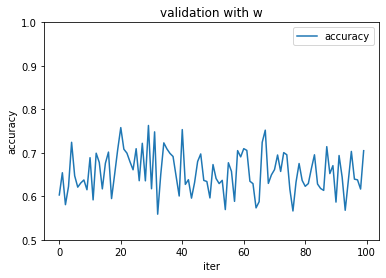

In [58]:
# validation with w
data = [0.6031, 0.6542, 0.5808, 0.6226, 0.7242, 0.6473, 0.6211, 0.6308, 0.6376, 0.6151, 0.6888, 0.5918, 0.6991, 0.678, 0.6171, 0.6762, 0.7017, 0.5948, 0.6504, 0.7076, 0.758, 0.7084, 0.6993, 0.6793, 0.661, 0.7095, 0.6359, 0.7219, 0.6356, 0.7629, 0.6174, 0.7482, 0.5589, 0.6501, 0.7229, 0.7091, 0.6987, 0.6916, 0.646, 0.6007, 0.7534, 0.6274, 0.6382, 0.5958, 0.6315, 0.6801, 0.6974, 0.6366, 0.6341, 0.5963, 0.673, 0.6409, 0.6293, 0.6367, 0.5695, 0.6772, 0.6574, 0.5884, 0.7051, 0.6907, 0.7096, 0.7056, 0.6347, 0.6291, 0.5734, 0.5876, 0.7241, 0.7521, 0.6297, 0.6493, 0.6613, 0.695, 0.6572, 0.7005, 0.6956, 0.6161, 0.5663, 0.6325, 0.6754, 0.6365, 0.623, 0.6293, 0.6638, 0.6955, 0.6283, 0.618, 0.6136, 0.7142, 0.6523, 0.6705, 0.5867, 0.6938, 0.6443, 0.5679, 0.6351, 0.7032, 0.6395, 0.6379, 0.6167, 0.7049]

spar_data = pd.DataFrame(data,columns=['accuracy'])
spar_data.plot(title="validation with w",ylim=(0.5,1),xlabel="iter",ylabel="accuracy")

<AxesSubplot:title={'center':'validation with avg_w'}, xlabel='iter', ylabel='accuracy'>

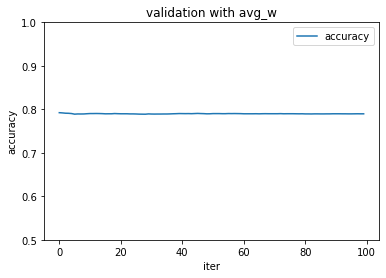

In [59]:
# validation with avg_w
data = [0.7923, 0.7918, 0.7911, 0.7909, 0.7903, 0.7889, 0.7894, 0.7893, 0.7894, 0.7899, 0.7903, 0.7903, 0.7904, 0.7903, 0.7901, 0.7897, 0.7898, 0.7898, 0.7903, 0.79, 0.7898, 0.7898, 0.7898, 0.7895, 0.7895, 0.7893, 0.789, 0.7889, 0.7888, 0.7895, 0.7892, 0.7891, 0.7892, 0.7892, 0.7893, 0.7893, 0.7895, 0.7898, 0.79, 0.7903, 0.7902, 0.7901, 0.7902, 0.79, 0.7903, 0.7906, 0.7903, 0.7901, 0.7897, 0.7898, 0.7902, 0.7902, 0.7902, 0.79, 0.79, 0.7903, 0.7902, 0.7903, 0.7902, 0.7901, 0.7898, 0.7898, 0.7898, 0.7898, 0.7899, 0.7897, 0.7899, 0.79, 0.7899, 0.7899, 0.7899, 0.7899, 0.7901, 0.7898, 0.7899, 0.7899, 0.7899, 0.7898, 0.7897, 0.7898, 0.7895, 0.7895, 0.7894, 0.7896, 0.7896, 0.7895, 0.7895, 0.7896, 0.7896, 0.7898, 0.7898, 0.7898, 0.7897, 0.7897, 0.7896, 0.7896, 0.7897, 0.7898, 0.7897, 0.7897]

spar_data = pd.DataFrame(data,columns=['accuracy'])
spar_data.plot(title="validation with avg_w",ylim=(0.5,1),xlabel="iter",ylabel="accuracy")

# part2

In [47]:
table = pd.read_csv('IA2-train.csv')

# initialize w and avg_w
w = pd.Series(1, index=list(range(197)), dtype='float32')
avg_w = pd.Series(1, index=list(range(197)), dtype='float32')
alpha = pd.Series(0, index=list(range(6000)),dtype='int')
xi = table.iloc[:,:197]

# set hyperparameter
maxiter = 100
p = 2


predict_acc_list = []
predict_val_acc_list = []

# normalizaion (age, annual_premium, vintage)
mean = []
std = []

mean.append(xi.loc[:,"Age"].mean())
std.append(xi.loc[:,"Age"].std())

mean.append(xi.loc[:,"Annual_Premium"].mean())
std.append(xi.loc[:,"Annual_Premium"].std())

mean.append(xi.loc[:,"Vintage"].mean())
std.append(xi.loc[:,"Vintage"].std())

xi.loc[:,"Age"] = (xi.loc[:,"Age"] - xi.loc[:,"Age"].mean()) / xi.loc[:,"Age"].std()
xi.loc[:,"Annual_Premium"] = (xi.loc[:,"Annual_Premium"] - xi.loc[:,"Annual_Premium"].mean()) / xi.loc[:,"Annual_Premium"].std()
xi.loc[:,"Vintage"] = (xi.loc[:,"Vintage"] - xi.loc[:,"Vintage"].mean()) / xi.loc[:,"Vintage"].std()

# result y
y = table.loc[:,['Response']]
y = y.replace(0,-1)
yn = y['Response'].to_numpy()
y_result = y['Response'].values.tolist()

# for prediction
yn_predict = np.expand_dims(yn, axis=0)
yn_predict = np.repeat(yn_predict,repeats=xi.shape[0],axis=0)


# validation dataset preprocessing
table2 = pd.read_csv('IA2-dev.csv')
val_xi = table2.iloc[:,:197]

val_xi.loc[:,"Age"] = (val_xi.loc[:,"Age"] - mean.pop(0)) / std.pop(0)
val_xi.loc[:,"Annual_Premium"] = (val_xi.loc[:,"Annual_Premium"] - mean.pop(0)) / std.pop(0)
val_xi.loc[:,"Vintage"] = (val_xi.loc[:,"Vintage"] - mean.pop(0)) / std.pop(0)

# result yn
val_y = table2.loc[:,['Response']]
val_y = val_y.replace(0,-1)
val_yn = val_y['Response'].to_numpy()
val_y_result = val_y['Response'].values.tolist()


# compute kernel matrix
k_matrix = np.power(np.dot(xi.to_numpy(),xi.to_numpy().T),p)
val_matrix = np.power(np.dot(val_xi.to_numpy(),xi.to_numpy().T),p)

val_yn_predict = np.expand_dims(yn, axis=0)
val_yn_predict = np.repeat(val_yn_predict,repeats=val_xi.shape[0],axis=0)

for itr in range(maxiter):
    for i in range(xi.shape[0]):
        u = np.sum(alpha*k_matrix[i]*yn)
        if u*yn[i] <= 0:
            alpha[i] += 1
    
    alpha_predict = np.expand_dims(alpha, axis=0)
    alpha_predict = np.repeat(alpha_predict,repeats=k_matrix.shape[0],axis=0)
    
    prediction = np.sum((alpha_predict*k_matrix*yn_predict),axis=1)
    for i in range(len(prediction)):
        if prediction[i] >= 0:
            prediction[i] = 1
        else:
            prediction[i] = -1

    count = 0
    for i in range(len(prediction)):
        if prediction[i] == y_result[i]:
            count += 1

    predict_acc = count / len(prediction)
    print("\n\n========", itr,"th predicted training accuracy========")
    print(predict_acc)
    predict_acc_list.append(predict_acc) 
    
    # validation prediction
    val_alpha_predict = np.expand_dims(alpha, axis=0)
    val_alpha_predict = np.repeat(val_alpha_predict,repeats=val_matrix.shape[0],axis=0)
    
#     print(val_alpha_predict.shape)
#     print(val_matrix.shape)

    val_prediction = np.sum((val_alpha_predict*val_matrix*val_yn_predict),axis=1)
    for i in range(len(val_prediction)):
        if val_prediction[i] >= 0:
            val_prediction[i] = 1
        else:
            val_prediction[i] = -1

    count1 = 0
    for i in range(len(val_prediction)):
        if val_prediction[i] == val_y_result[i]:
            count1 += 1

    val_predict_acc = count1 / len(val_prediction)
    print("\n\n========", itr,"th predicted validation accuracy========")
    print(val_predict_acc)
    predict_val_acc_list.append(val_predict_acc) 

print(predict_acc_list)
print(predict_val_acc_list)


/usr/local/Cellar/jupyterlab/3.0.16_1/libexec/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)




======== 0 th predicted training accuracy========
0.7088333333333333


======== 0 th predicted validation accuracy========
0.6856


======== 1 th predicted training accuracy========
0.6895


======== 1 th predicted validation accuracy========
0.6596


======== 2 th predicted training accuracy========
0.6428333333333334


======== 2 th predicted validation accuracy========
0.6211


======== 3 th predicted training accuracy========
0.71


======== 3 th predicted validation accuracy========
0.6776


======== 4 th predicted training accuracy========
0.6728333333333333


======== 4 th predicted validation accuracy========
0.6425


======== 5 th predicted training accuracy========
0.6868333333333333


======== 5 th predicted validation accuracy========
0.6568


======== 6 th predicted training accuracy========
0.7676666666666667


======== 6 th predicted validation accuracy========
0.7307


======== 7 th predicted training accuracy========
0.7325


======== 7 th predicted validation accura



======== 63 th predicted validation accuracy========
0.7076


======== 64 th predicted training accuracy========
0.7496666666666667


======== 64 th predicted validation accuracy========
0.6937


======== 65 th predicted training accuracy========
0.7555


======== 65 th predicted validation accuracy========
0.6924


======== 66 th predicted training accuracy========
0.7346666666666667


======== 66 th predicted validation accuracy========
0.677


======== 67 th predicted training accuracy========
0.732


======== 67 th predicted validation accuracy========
0.6757


======== 68 th predicted training accuracy========
0.7333333333333333


======== 68 th predicted validation accuracy========
0.6766


======== 69 th predicted training accuracy========
0.7326666666666667


======== 69 th predicted validation accuracy========
0.6793


======== 70 th predicted training accuracy========
0.7051666666666667


======== 70 th predicted validation accuracy========
0.6485


======== 71 th predicted

# result

<AxesSubplot:title={'center':'Accuracy with p=1'}, xlabel='iter', ylabel='accuracy'>

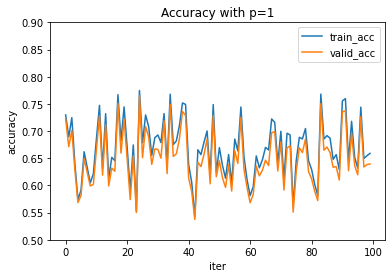

In [78]:
data = [[0.7296666666666667, 0.6893333333333334, 0.7246666666666667, 0.6395, 0.5738333333333333, 0.5915, 0.662, 0.6333333333333333, 0.6046666666666667, 0.6213333333333333, 0.6853333333333333, 0.7473333333333333, 0.6311666666666667, 0.732, 0.6136666666666667, 0.6516666666666666, 0.6453333333333333, 0.767, 0.682, 0.7445, 0.67, 0.5901666666666666, 0.6745, 0.5528333333333333, 0.7746666666666666, 0.6786666666666666, 0.7296666666666667, 0.708, 0.6551666666666667, 0.6878333333333333, 0.6928333333333333, 0.6788333333333333, 0.7321666666666666, 0.6375, 0.7678333333333334, 0.6751666666666667, 0.6818333333333333, 0.7101666666666666, 0.7518333333333334, 0.749, 0.6383333333333333, 0.6056666666666667, 0.5426666666666666, 0.6656666666666666, 0.6566666666666666, 0.6796666666666666, 0.7001666666666667, 0.6176666666666667, 0.7488333333333334, 0.6236666666666667, 0.6695, 0.637, 0.6133333333333333, 0.6568333333333334, 0.6033333333333334, 0.6853333333333333, 0.6635, 0.7443333333333333, 0.6526666666666666, 0.6106666666666667, 0.5811666666666667, 0.5976666666666667, 0.6543333333333333, 0.6323333333333333, 0.6473333333333333, 0.67, 0.6653333333333333, 0.7223333333333334, 0.716, 0.6401666666666667, 0.6996666666666667, 0.6106666666666667, 0.696, 0.693, 0.561, 0.6458333333333334, 0.6885, 0.6855, 0.7046666666666667, 0.6453333333333333, 0.6295, 0.6018333333333333, 0.5816666666666667, 0.768, 0.6853333333333333, 0.6916666666666667, 0.6868333333333333, 0.648, 0.6566666666666666, 0.629, 0.7553333333333333, 0.7596666666666667, 0.645, 0.718, 0.6516666666666666, 0.6318333333333334, 0.744, 0.6496666666666666, 0.6546666666666666, 0.659],[0.7224, 0.6712, 0.701, 0.6283, 0.5685, 0.5817, 0.6496, 0.6243, 0.5991, 0.6018, 0.666, 0.7283, 0.619, 0.7114, 0.5991, 0.6319, 0.6261, 0.7508, 0.6595, 0.7212, 0.6494, 0.5739, 0.6546, 0.5501, 0.7648, 0.651, 0.7084, 0.6888, 0.6387, 0.6671, 0.6662, 0.6501, 0.719, 0.6218, 0.7494, 0.6534, 0.6582, 0.6856, 0.736, 0.7286, 0.6133, 0.5889, 0.5374, 0.6426, 0.6347, 0.6571, 0.6855, 0.603, 0.7288, 0.616, 0.6454, 0.6141, 0.5963, 0.6384, 0.5897, 0.6638, 0.6404, 0.7253, 0.6296, 0.5961, 0.5682, 0.5832, 0.6358, 0.6176, 0.628, 0.6466, 0.6367, 0.6972, 0.6987, 0.6265, 0.6798, 0.5915, 0.6691, 0.6729, 0.551, 0.626, 0.6693, 0.6605, 0.6855, 0.6255, 0.6121, 0.5893, 0.5723, 0.7505, 0.6648, 0.6706, 0.6605, 0.6334, 0.6346, 0.61, 0.7355, 0.7375, 0.6271, 0.6956, 0.6365, 0.6196, 0.7264, 0.634, 0.6384, 0.6394]]
# p=1

numpy_array = np.array(data)
transpose = numpy_array.T

spar_data = pd.DataFrame(transpose,columns=['train_acc','valid_acc'])
spar_data.plot(title="Accuracy with p=1",ylim=(0.5,0.9),xlabel="iter",ylabel="accuracy")

<AxesSubplot:title={'center':'Accuracy with p=2'}, xlabel='iter', ylabel='accuracy'>

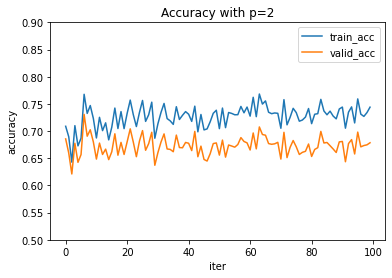

In [77]:
data = [[0.7088333333333333, 0.6895, 0.6428333333333334, 0.71, 0.6728333333333333, 0.6868333333333333, 0.7676666666666667, 0.7325, 0.747, 0.7233333333333334, 0.6873333333333334, 0.7253333333333334, 0.7008333333333333, 0.7151666666666666, 0.6838333333333333, 0.7071666666666667, 0.7423333333333333, 0.7046666666666667, 0.7358333333333333, 0.7045, 0.7326666666666667, 0.757, 0.7301666666666666, 0.7083333333333334, 0.7341666666666666, 0.7563333333333333, 0.7178333333333333, 0.73, 0.7531666666666667, 0.6868333333333333, 0.7133333333333334, 0.7341666666666666, 0.7508333333333334, 0.723, 0.7188333333333333, 0.7123333333333334, 0.7448333333333333, 0.7213333333333334, 0.729, 0.7358333333333333, 0.731, 0.7178333333333333, 0.7458333333333333, 0.6986666666666667, 0.7305, 0.7021666666666667, 0.704, 0.717, 0.7326666666666667, 0.7383333333333333, 0.7045, 0.7423333333333333, 0.7063333333333334, 0.7341666666666666, 0.7325, 0.73, 0.7301666666666666, 0.7453333333333333, 0.7336666666666667, 0.7441666666666666, 0.7275, 0.7621666666666667, 0.7265, 0.7681666666666667, 0.7496666666666667, 0.7555, 0.7346666666666667, 0.732, 0.7333333333333333, 0.7326666666666667, 0.7051666666666667, 0.7578333333333334, 0.7115, 0.7253333333333334, 0.7418333333333333, 0.734, 0.7181666666666666, 0.7203333333333334, 0.7258333333333333, 0.7415, 0.7136666666666667, 0.731, 0.732, 0.7583333333333333, 0.737, 0.73, 0.7366666666666667, 0.7276666666666667, 0.7225, 0.7406666666666667, 0.7441666666666666, 0.7053333333333334, 0.7348333333333333, 0.7445, 0.715, 0.7591666666666667, 0.7311666666666666, 0.727, 0.734, 0.744],[0.6856, 0.6596, 0.6211, 0.6776, 0.6425, 0.6568, 0.7307, 0.6906, 0.7024, 0.6802, 0.6485, 0.6779, 0.657, 0.6668, 0.6475, 0.662, 0.695, 0.6556, 0.6792, 0.657, 0.6803, 0.7041, 0.6797, 0.6529, 0.6816, 0.7009, 0.6647, 0.6769, 0.6978, 0.6371, 0.6603, 0.6797, 0.6948, 0.6671, 0.6663, 0.662, 0.6926, 0.6697, 0.6693, 0.6791, 0.6776, 0.6641, 0.6994, 0.6528, 0.6723, 0.6478, 0.6449, 0.6583, 0.677, 0.6782, 0.6558, 0.6834, 0.6521, 0.6744, 0.6725, 0.6704, 0.6753, 0.688, 0.6809, 0.6783, 0.6652, 0.6965, 0.6673, 0.7076, 0.6937, 0.6924, 0.677, 0.6757, 0.6766, 0.6793, 0.6485, 0.6977, 0.6512, 0.6701, 0.6826, 0.6711, 0.657, 0.6609, 0.6628, 0.6762, 0.6533, 0.6662, 0.6695, 0.6994, 0.6781, 0.679, 0.6731, 0.6671, 0.6606, 0.6801, 0.6809, 0.6436, 0.677, 0.6843, 0.6579, 0.6981, 0.671, 0.6734, 0.6747, 0.6785]]
# p=2

numpy_array = np.array(data)
transpose = numpy_array.T

spar_data = pd.DataFrame(transpose,columns=['train_acc','valid_acc'])
spar_data.plot(title="Accuracy with p=2",ylim=(0.5,0.9),xlabel="iter",ylabel="accuracy")

<AxesSubplot:title={'center':'Accuracy with p=3'}, xlabel='iter', ylabel='accuracy'>

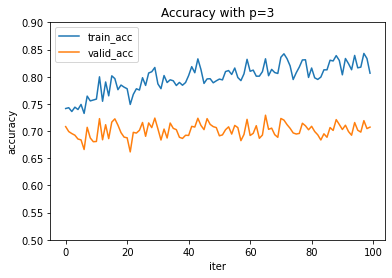

In [76]:
data = [[0.7415, 0.743, 0.736, 0.744, 0.7396666666666667, 0.749, 0.7325, 0.7643333333333333, 0.7555, 0.7571666666666667, 0.7588333333333334, 0.7998333333333333, 0.7548333333333334, 0.7903333333333333, 0.7648333333333334, 0.8016666666666666, 0.7965, 0.7761666666666667, 0.7846666666666666, 0.7808333333333334, 0.7778333333333334, 0.749, 0.7675, 0.7778333333333334, 0.7755, 0.7981666666666667, 0.784, 0.8068333333333333, 0.8091666666666667, 0.817, 0.7868333333333334, 0.778, 0.8021666666666667, 0.7893333333333333, 0.7943333333333333, 0.7925, 0.7838333333333334, 0.7895, 0.7843333333333333, 0.7893333333333333, 0.8021666666666667, 0.8185, 0.8073333333333333, 0.8328333333333333, 0.8133333333333334, 0.7876666666666666, 0.796, 0.7963333333333333, 0.7888333333333334, 0.7925, 0.7956666666666666, 0.7941666666666667, 0.8095, 0.8113333333333334, 0.8041666666666667, 0.816, 0.7985, 0.7928333333333333, 0.8053333333333333, 0.832, 0.81, 0.8121666666666667, 0.801, 0.801, 0.8093333333333333, 0.833, 0.8018333333333333, 0.8135, 0.8076666666666666, 0.806, 0.8358333333333333, 0.8421666666666666, 0.8331666666666667, 0.82, 0.7948333333333333, 0.8073333333333333, 0.8178333333333333, 0.8308333333333333, 0.8311666666666667, 0.7986666666666666, 0.816, 0.798, 0.795, 0.7993333333333333, 0.8126666666666666, 0.8126666666666666, 0.8303333333333334, 0.829, 0.8388333333333333, 0.83, 0.8035, 0.8335, 0.824, 0.8128333333333333, 0.8391666666666666, 0.8163333333333334, 0.8176666666666667, 0.8428333333333333, 0.8335, 0.8065],[0.7082, 0.6991, 0.6954, 0.6924, 0.6854, 0.6838, 0.6661, 0.7069, 0.6874, 0.6804, 0.6809, 0.7229, 0.684, 0.7117, 0.6861, 0.7165, 0.7225, 0.7109, 0.6971, 0.6889, 0.6876, 0.6617, 0.6977, 0.6963, 0.7015, 0.7158, 0.6904, 0.715, 0.7064, 0.7239, 0.7042, 0.6836, 0.7037, 0.6873, 0.7148, 0.705, 0.7026, 0.6886, 0.6865, 0.6923, 0.692, 0.7087, 0.7074, 0.7236, 0.7104, 0.7027, 0.7229, 0.7123, 0.7082, 0.7064, 0.6913, 0.693, 0.7025, 0.7078, 0.6945, 0.7104, 0.7064, 0.6824, 0.6938, 0.7216, 0.6919, 0.6958, 0.7099, 0.6867, 0.6927, 0.7292, 0.7032, 0.7054, 0.6934, 0.6885, 0.7232, 0.7202, 0.7119, 0.7051, 0.6966, 0.6946, 0.6957, 0.7144, 0.7097, 0.7024, 0.7088, 0.6992, 0.6931, 0.6836, 0.695, 0.6886, 0.7065, 0.7012, 0.7211, 0.7122, 0.7029, 0.7108, 0.6991, 0.6924, 0.7157, 0.7016, 0.6981, 0.7192, 0.7046, 0.7073]]
# p=3

numpy_array = np.array(data)
transpose = numpy_array.T

spar_data = pd.DataFrame(transpose,columns=['train_acc','valid_acc'])
spar_data.plot(title="Accuracy with p=3",ylim=(0.5,0.9),xlabel="iter",ylabel="accuracy")

<AxesSubplot:title={'center':'Accuracy with p=4'}, xlabel='iter', ylabel='accuracy'>

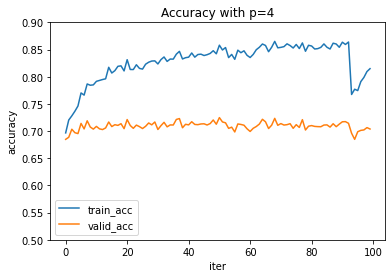

In [79]:
data = [[0.6966666666666667, 0.7203333333333334, 0.728, 0.7365, 0.7461666666666666, 0.7701666666666667, 0.7661666666666667, 0.7866666666666666, 0.7843333333333333, 0.785, 0.7915, 0.7931666666666667, 0.7948333333333333, 0.7961666666666667, 0.8173333333333334, 0.8068333333333333, 0.8111666666666667, 0.8191666666666667, 0.82, 0.8106666666666666, 0.8313333333333334, 0.8133333333333334, 0.8131666666666667, 0.822, 0.8153333333333334, 0.814, 0.823, 0.8266666666666667, 0.8288333333333333, 0.8291666666666667, 0.8235, 0.8315, 0.8363333333333334, 0.8281666666666667, 0.8325, 0.8323333333333334, 0.8415, 0.8466666666666667, 0.8326666666666667, 0.835, 0.836, 0.8436666666666667, 0.836, 0.8408333333333333, 0.8415, 0.839, 0.8405, 0.8428333333333333, 0.8478333333333333, 0.8421666666666666, 0.858, 0.8491666666666666, 0.8536666666666667, 0.8351666666666666, 0.841, 0.832, 0.8488333333333333, 0.8441666666666666, 0.8476666666666667, 0.8393333333333334, 0.8353333333333334, 0.841, 0.8496666666666667, 0.8541666666666666, 0.8601666666666666, 0.8575, 0.846, 0.8541666666666666, 0.865, 0.8531666666666666, 0.854, 0.8553333333333333, 0.8605, 0.8573333333333333, 0.8528333333333333, 0.8593333333333333, 0.8518333333333333, 0.8621666666666666, 0.8468333333333333, 0.8578333333333333, 0.8565, 0.851, 0.8516666666666667, 0.854, 0.8603333333333333, 0.8541666666666666, 0.851, 0.8616666666666667, 0.8601666666666666, 0.8541666666666666, 0.8635, 0.8593333333333333, 0.8638333333333333, 0.7673333333333333, 0.777, 0.7745, 0.791, 0.7986666666666666, 0.8095, 0.8148333333333333],[0.6848, 0.6886, 0.7034, 0.697, 0.6954, 0.7141, 0.704, 0.7189, 0.7075, 0.7036, 0.7086, 0.7041, 0.7028, 0.7058, 0.7167, 0.7083, 0.7117, 0.7105, 0.7136, 0.7045, 0.7212, 0.7103, 0.7051, 0.711, 0.7082, 0.7047, 0.7088, 0.7149, 0.7115, 0.7167, 0.7029, 0.71, 0.7161, 0.7078, 0.7113, 0.7112, 0.7214, 0.723, 0.7061, 0.7125, 0.7114, 0.7172, 0.7122, 0.7118, 0.7131, 0.7134, 0.7112, 0.7138, 0.7204, 0.7126, 0.7248, 0.7168, 0.7152, 0.705, 0.7072, 0.6984, 0.7131, 0.7122, 0.7108, 0.7042, 0.6993, 0.7051, 0.7084, 0.7129, 0.7217, 0.7171, 0.7047, 0.7108, 0.7234, 0.7106, 0.7138, 0.7111, 0.7118, 0.7136, 0.7051, 0.7118, 0.7067, 0.721, 0.702, 0.709, 0.7101, 0.7086, 0.7082, 0.708, 0.7111, 0.7114, 0.7073, 0.7135, 0.7081, 0.7128, 0.7171, 0.7174, 0.7143, 0.696, 0.6848, 0.6988, 0.7013, 0.7021, 0.7064, 0.7038]]
# p=4

numpy_array = np.array(data)
transpose = numpy_array.T

spar_data = pd.DataFrame(transpose,columns=['train_acc','valid_acc'])
spar_data.plot(title="Accuracy with p=4",ylim=(0.5,0.9),xlabel="iter",ylabel="accuracy")

<AxesSubplot:title={'center':'Accuracy with p=5'}, xlabel='iter', ylabel='accuracy'>

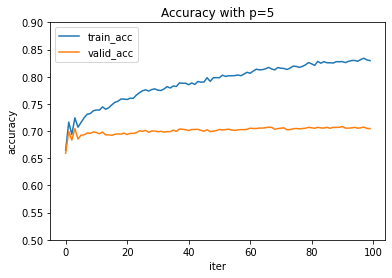

In [81]:
data = [[0.6646666666666666, 0.7165, 0.6938333333333333, 0.7243333333333334, 0.7071666666666667, 0.7158333333333333, 0.7245, 0.731, 0.7321666666666666, 0.7373333333333333, 0.7388333333333333, 0.7386666666666667, 0.7445, 0.7401666666666666, 0.7428333333333333, 0.7481666666666666, 0.7528333333333334, 0.7548333333333334, 0.759, 0.7588333333333334, 0.7581666666666667, 0.7603333333333333, 0.7603333333333333, 0.7661666666666667, 0.7706666666666667, 0.7741666666666667, 0.7758333333333334, 0.7736666666666666, 0.7763333333333333, 0.7776666666666666, 0.7751666666666667, 0.7746666666666666, 0.7775, 0.7818333333333334, 0.7791666666666667, 0.783, 0.782, 0.7886666666666666, 0.788, 0.788, 0.7853333333333333, 0.7885, 0.7858333333333334, 0.7911666666666667, 0.79, 0.7903333333333333, 0.7981666666666667, 0.7915, 0.798, 0.7983333333333333, 0.7981666666666667, 0.8028333333333333, 0.8005, 0.8016666666666666, 0.8018333333333333, 0.802, 0.8031666666666667, 0.8018333333333333, 0.8048333333333333, 0.8081666666666667, 0.8063333333333333, 0.8103333333333333, 0.8138333333333333, 0.8126666666666666, 0.813, 0.8145, 0.8171666666666667, 0.8143333333333334, 0.8125, 0.8168333333333333, 0.8156666666666667, 0.8151666666666667, 0.8133333333333334, 0.8158333333333333, 0.8195, 0.819, 0.8171666666666667, 0.819, 0.8218333333333333, 0.826, 0.8236666666666667, 0.8208333333333333, 0.8281666666666667, 0.8248333333333333, 0.8276666666666667, 0.8256666666666667, 0.8256666666666667, 0.8251666666666667, 0.8276666666666667, 0.8275, 0.8278333333333333, 0.826, 0.8283333333333334, 0.8296666666666667, 0.83, 0.8283333333333334, 0.8316666666666667, 0.834, 0.8308333333333333, 0.8296666666666667],[0.6593, 0.6995, 0.6834, 0.7045, 0.6854, 0.6925, 0.693, 0.6965, 0.6958, 0.6985, 0.6973, 0.6952, 0.6981, 0.693, 0.6931, 0.6923, 0.6941, 0.6949, 0.6944, 0.6961, 0.6937, 0.6959, 0.6956, 0.697, 0.7004, 0.6996, 0.7013, 0.6977, 0.7002, 0.7, 0.6988, 0.6996, 0.6981, 0.6991, 0.6988, 0.7018, 0.6995, 0.7038, 0.7033, 0.7026, 0.701, 0.7029, 0.703, 0.7031, 0.7013, 0.6998, 0.7024, 0.699, 0.6998, 0.7008, 0.7029, 0.7021, 0.7028, 0.7034, 0.702, 0.7012, 0.7022, 0.7027, 0.7026, 0.7033, 0.7053, 0.7048, 0.7047, 0.7056, 0.7055, 0.7061, 0.7072, 0.7069, 0.7033, 0.7046, 0.7053, 0.7059, 0.7024, 0.7028, 0.7043, 0.7048, 0.7041, 0.7047, 0.7052, 0.7069, 0.706, 0.7052, 0.7069, 0.7058, 0.7055, 0.707, 0.7051, 0.7069, 0.7068, 0.7069, 0.7083, 0.7055, 0.7054, 0.7059, 0.7069, 0.7053, 0.7061, 0.7073, 0.7049, 0.7046]]
# p=5

numpy_array = np.array(data)
transpose = numpy_array.T

spar_data = pd.DataFrame(transpose,columns=['train_acc','valid_acc'])
spar_data.plot(title="Accuracy with p=5",ylim=(0.5,0.9),xlabel="iter",ylabel="accuracy")

In [53]:
data = [0.6646666666666666, 0.7165, 0.6938333333333333, 0.7243333333333334, 0.7071666666666667, 0.7158333333333333, 0.7245, 0.731, 0.7321666666666666, 0.7373333333333333, 0.7388333333333333, 0.7386666666666667, 0.7445, 0.7401666666666666, 0.7428333333333333, 0.7481666666666666, 0.7528333333333334, 0.7548333333333334, 0.759, 0.7588333333333334, 0.7581666666666667, 0.7603333333333333, 0.7603333333333333, 0.7661666666666667, 0.7706666666666667, 0.7741666666666667, 0.7758333333333334, 0.7736666666666666, 0.7763333333333333, 0.7776666666666666, 0.7751666666666667, 0.7746666666666666, 0.7775, 0.7818333333333334, 0.7791666666666667, 0.783, 0.782, 0.7886666666666666, 0.788, 0.788, 0.7853333333333333, 0.7885, 0.7858333333333334, 0.7911666666666667, 0.79, 0.7903333333333333, 0.7981666666666667, 0.7915, 0.798, 0.7983333333333333, 0.7981666666666667, 0.8028333333333333, 0.8005, 0.8016666666666666, 0.8018333333333333, 0.802, 0.8031666666666667, 0.8018333333333333, 0.8048333333333333, 0.8081666666666667, 0.8063333333333333, 0.8103333333333333, 0.8138333333333333, 0.8126666666666666, 0.813, 0.8145, 0.8171666666666667, 0.8143333333333334, 0.8125, 0.8168333333333333, 0.8156666666666667, 0.8151666666666667, 0.8133333333333334, 0.8158333333333333, 0.8195, 0.819, 0.8171666666666667, 0.819, 0.8218333333333333, 0.826, 0.8236666666666667, 0.8208333333333333, 0.8281666666666667, 0.8248333333333333, 0.8276666666666667, 0.8256666666666667, 0.8256666666666667, 0.8251666666666667, 0.8276666666666667, 0.8275, 0.8278333333333333, 0.826, 0.8283333333333334, 0.8296666666666667, 0.83, 0.8283333333333334, 0.8316666666666667, 0.834, 0.8308333333333333, 0.8296666666666667]
data2 = [0.6593, 0.6995, 0.6834, 0.7045, 0.6854, 0.6925, 0.693, 0.6965, 0.6958, 0.6985, 0.6973, 0.6952, 0.6981, 0.693, 0.6931, 0.6923, 0.6941, 0.6949, 0.6944, 0.6961, 0.6937, 0.6959, 0.6956, 0.697, 0.7004, 0.6996, 0.7013, 0.6977, 0.7002, 0.7, 0.6988, 0.6996, 0.6981, 0.6991, 0.6988, 0.7018, 0.6995, 0.7038, 0.7033, 0.7026, 0.701, 0.7029, 0.703, 0.7031, 0.7013, 0.6998, 0.7024, 0.699, 0.6998, 0.7008, 0.7029, 0.7021, 0.7028, 0.7034, 0.702, 0.7012, 0.7022, 0.7027, 0.7026, 0.7033, 0.7053, 0.7048, 0.7047, 0.7056, 0.7055, 0.7061, 0.7072, 0.7069, 0.7033, 0.7046, 0.7053, 0.7059, 0.7024, 0.7028, 0.7043, 0.7048, 0.7041, 0.7047, 0.7052, 0.7069, 0.706, 0.7052, 0.7069, 0.7058, 0.7055, 0.707, 0.7051, 0.7069, 0.7068, 0.7069, 0.7083, 0.7055, 0.7054, 0.7059, 0.7069, 0.7053, 0.7061, 0.7073, 0.7049, 0.7046]
data = pd.DataFrame(data)
data2 = pd.DataFrame(data2)

print(data.max())
print(data.idxmax())

print(data2.max())
print(data2.idxmax())



0    0.834
dtype: float64
0    97
dtype: int64
0    0.7083
dtype: float64
0    90
dtype: int64


# part2a - (c)

In [112]:
table = pd.read_csv('IA2-train.csv')

# initialize w and avg_w
w = pd.Series(1, index=list(range(197)), dtype='float32')
avg_w = pd.Series(1, index=list(range(197)), dtype='float32')
alpha = pd.Series(0, index=list(range(6000)),dtype='int')
xi = table.iloc[:,:197]

# set hyperparameter
maxiter = 100
p = 1


predict_acc_list = []
predict_val_acc_list = []
run_time = {}

# normalizaion (age, annual_premium, vintage)
mean = []
std = []

mean.append(xi.loc[:,"Age"].mean())
std.append(xi.loc[:,"Age"].std())

mean.append(xi.loc[:,"Annual_Premium"].mean())
std.append(xi.loc[:,"Annual_Premium"].std())

mean.append(xi.loc[:,"Vintage"].mean())
std.append(xi.loc[:,"Vintage"].std())

xi.loc[:,"Age"] = (xi.loc[:,"Age"] - xi.loc[:,"Age"].mean()) / xi.loc[:,"Age"].std()
xi.loc[:,"Annual_Premium"] = (xi.loc[:,"Annual_Premium"] - xi.loc[:,"Annual_Premium"].mean()) / xi.loc[:,"Annual_Premium"].std()
xi.loc[:,"Vintage"] = (xi.loc[:,"Vintage"] - xi.loc[:,"Vintage"].mean()) / xi.loc[:,"Vintage"].std()

# result y
y = table.loc[:,['Response']]
y = y.replace(0,-1)
yn = y['Response'].to_numpy()
y_result = y['Response'].values.tolist()

# for prediction
yn_predict = np.expand_dims(yn, axis=0)
yn_predict = np.repeat(yn_predict,repeats=xi.shape[0],axis=0)


# validation dataset preprocessing
table2 = pd.read_csv('IA2-dev.csv')
val_xi = table2.iloc[:,:197]

val_xi.loc[:,"Age"] = (val_xi.loc[:,"Age"] - mean.pop(0)) / std.pop(0)
val_xi.loc[:,"Annual_Premium"] = (val_xi.loc[:,"Annual_Premium"] - mean.pop(0)) / std.pop(0)
val_xi.loc[:,"Vintage"] = (val_xi.loc[:,"Vintage"] - mean.pop(0)) / std.pop(0)

# result yn
val_y = table2.loc[:,['Response']]
val_y = val_y.replace(0,-1)
val_yn = val_y['Response'].to_numpy()
val_y_result = val_y['Response'].values.tolist()


# compute kernel matrix
k_matrix = np.power(np.dot(xi.to_numpy(),xi.to_numpy().T),p)
val_matrix = np.power(np.dot(val_xi.to_numpy(),xi.to_numpy().T),p)

val_yn_predict = np.expand_dims(yn, axis=0)
val_yn_predict = np.repeat(val_yn_predict,repeats=val_xi.shape[0],axis=0)

start_time = time.time()
for itr in range(maxiter):
    for i in range(xi.shape[0]):
        u = np.sum(alpha*k_matrix[i]*yn)
        if u*yn[i] <= 0:
            alpha[i] += 1
    
    # training prediction
    alpha_predict = np.repeat(np.expand_dims(alpha, axis=0),repeats=k_matrix.shape[0],axis=0)

    prediction = np.where(np.sum((alpha_predict*k_matrix*yn_predict),axis=1)>=0,1,-1)
    
    count = np.sum(np.where((prediction - y_result)==0,1,0))

    predict_acc = count / len(prediction)
    print("\n\n========", itr,"th predicted training accuracy========")
    print(predict_acc)
    predict_acc_list.append(predict_acc) 
    
    # validation prediction
    val_alpha_predict = np.repeat(np.expand_dims(alpha, axis=0),repeats=val_matrix.shape[0],axis=0)
    
    val_prediction = np.where(np.sum((val_alpha_predict*val_matrix*val_yn_predict),axis=1)>=0,1,-1)

    count1 = np.sum(np.where((val_prediction - val_y_result)==0,1,0))

    val_predict_acc = count1 / len(val_prediction)
    print("\n\n========", itr,"th predicted validation accuracy========")
    print(val_predict_acc)
    predict_val_acc_list.append(val_predict_acc) 


run_time['online perceptron'] = time.time() - start_time

print(predict_acc_list)
print(predict_val_acc_list)
print("Learning time:\n")
print(run_time['online perceptron'])



======== 0 th predicted training accuracy========
0.7296666666666667


======== 0 th predicted validation accuracy========
0.7224


======== 1 th predicted training accuracy========
0.6893333333333334


======== 1 th predicted validation accuracy========
0.6712


======== 2 th predicted training accuracy========
0.7246666666666667


======== 2 th predicted validation accuracy========
0.701


======== 3 th predicted training accuracy========
0.6395


======== 3 th predicted validation accuracy========
0.6283


======== 4 th predicted training accuracy========
0.5738333333333333


======== 4 th predicted validation accuracy========
0.5685


======== 5 th predicted training accuracy========
0.5915


======== 5 th predicted validation accuracy========
0.5817


======== 6 th predicted training accuracy========
0.662


======== 6 th predicted validation accuracy========
0.6496


======== 7 th predicted training accuracy========
0.6333333333333333


======== 7 th predicted validation accura



======== 63 th predicted training accuracy========
0.6323333333333333


======== 63 th predicted validation accuracy========
0.6176


======== 64 th predicted training accuracy========
0.6473333333333333


======== 64 th predicted validation accuracy========
0.628


======== 65 th predicted training accuracy========
0.67


======== 65 th predicted validation accuracy========
0.6466


======== 66 th predicted training accuracy========
0.6653333333333333


======== 66 th predicted validation accuracy========
0.6367


======== 67 th predicted training accuracy========
0.7223333333333334


======== 67 th predicted validation accuracy========
0.6972


======== 68 th predicted training accuracy========
0.716


======== 68 th predicted validation accuracy========
0.6987


======== 69 th predicted training accuracy========
0.6401666666666667


======== 69 th predicted validation accuracy========
0.6265


======== 70 th predicted training accuracy========
0.6996666666666667


======== 70 th p

# part2a (c)

In [78]:
table = pd.read_csv('IA2-train.csv')
table2 = pd.read_csv('IA2-dev.csv')

# table2
x_sum = pd.concat([table,table2])
x_sum = x_sum.reset_index(drop=True)

xi = x_sum.iloc[:10000,:197]


alpha = pd.Series(0, index=list(range(xi.shape[0])),dtype='int')

# set hyperparameter
maxiter = 100
p = 1


predict_acc_list = []
predict_val_acc_list = []
run_time = {}

# normalizaion (age, annual_premium, vintage)
mean = []
std = []

mean.append(xi.loc[:,"Age"].mean())
std.append(xi.loc[:,"Age"].std())

mean.append(xi.loc[:,"Annual_Premium"].mean())
std.append(xi.loc[:,"Annual_Premium"].std())

mean.append(xi.loc[:,"Vintage"].mean())
std.append(xi.loc[:,"Vintage"].std())

xi.loc[:,"Age"] = (xi.loc[:,"Age"] - xi.loc[:,"Age"].mean()) / xi.loc[:,"Age"].std()
xi.loc[:,"Annual_Premium"] = (xi.loc[:,"Annual_Premium"] - xi.loc[:,"Annual_Premium"].mean()) / xi.loc[:,"Annual_Premium"].std()
xi.loc[:,"Vintage"] = (xi.loc[:,"Vintage"] - xi.loc[:,"Vintage"].mean()) / xi.loc[:,"Vintage"].std()

# result y
y = x_sum.loc[:9999,['Response']]
y = y.replace(0,-1)
yn = y['Response'].to_numpy()
y_result = y['Response'].values.tolist()

# for prediction
yn_predict = np.expand_dims(yn, axis=0)
yn_predict = np.repeat(yn_predict,repeats=xi.shape[0],axis=0)


# # validation dataset preprocessing
# table2 = pd.read_csv('IA2-dev.csv')
# val_xi = table2.iloc[:,:197]

# val_xi.loc[:,"Age"] = (val_xi.loc[:,"Age"] - mean.pop(0)) / std.pop(0)
# val_xi.loc[:,"Annual_Premium"] = (val_xi.loc[:,"Annual_Premium"] - mean.pop(0)) / std.pop(0)
# val_xi.loc[:,"Vintage"] = (val_xi.loc[:,"Vintage"] - mean.pop(0)) / std.pop(0)

# # result yn
# val_y = table2.loc[:,['Response']]
# val_y = val_y.replace(0,-1)
# val_yn = val_y['Response'].to_numpy()
# val_y_result = val_y['Response'].values.tolist()


# compute kernel matrix
k_matrix = np.power(np.dot(xi.to_numpy(),xi.to_numpy().T),p)

start_time = time.time()
for itr in range(maxiter):
    for i in range(xi.shape[0]):
        u = np.sum(alpha*k_matrix[i]*yn)
        if u*yn[i] <= 0:
            alpha[i] += 1
    
    # training prediction
    alpha_predict = np.repeat(np.expand_dims(alpha, axis=0),repeats=k_matrix.shape[0],axis=0)

    prediction = np.where(np.sum((alpha_predict*k_matrix*yn_predict),axis=1)>=0,1,-1)
    
    count = np.sum(np.where((prediction - y_result)==0,1,0))

    predict_acc = count / len(prediction)
    print("\n\n========", itr,"th predicted training accuracy========")
    print(predict_acc)
    predict_acc_list.append(predict_acc) 

run_time['online perceptron'] = time.time() - start_time

print(predict_acc_list)
print("Learning time:\n")
print(run_time['online perceptron'])



======== 0 th predicted training accuracy========
0.7737


======== 1 th predicted training accuracy========
0.7727


======== 2 th predicted training accuracy========
0.772


======== 3 th predicted training accuracy========
0.737


======== 4 th predicted training accuracy========
0.768


======== 5 th predicted training accuracy========
0.7824


======== 6 th predicted training accuracy========
0.7217


======== 7 th predicted training accuracy========
0.75


======== 8 th predicted training accuracy========
0.7869


======== 9 th predicted training accuracy========
0.7501


======== 10 th predicted training accuracy========
0.7818


======== 11 th predicted training accuracy========
0.7873


======== 12 th predicted training accuracy========
0.7887


======== 13 th predicted training accuracy========
0.7597


======== 14 th predicted training accuracy========
0.7704


======== 15 th predicted training accuracy========
0.7758


======== 16 th predicted training accuracy========
0.

<AxesSubplot:title={'center':'empirical runtime as a function of N'}, xlabel='N size', ylabel='run time'>

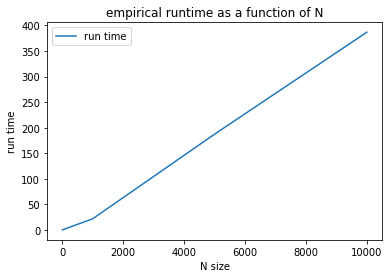

In [77]:
data = [0.24178004264831543,2.296732187271118,21.87843894958496,187.28013014793396,386.7425501346588]
# learining time

numpy_array = np.array(data)
transpose = numpy_array.T

spar_data = pd.DataFrame(transpose,columns=['run time'],index=[10,100,1000,5000,10000])
spar_data.plot(title="empirical runtime as a function of N",xlabel="N size",ylabel="run time")

# part2-b

In [64]:
table = pd.read_csv('IA2-train.csv')

# initialize w and avg_w
w = pd.Series(1, index=list(range(197)), dtype='float32')
avg_w = pd.Series(1, index=list(range(197)), dtype='float32')
alpha = pd.Series(0, index=list(range(6000)),dtype='int')
xi = table.iloc[:,:197]
alpha_temp = pd.Series(0, index=list(range(6000)),dtype='int')

# set hyperparameter
maxiter = 100
p = 1


predict_acc_list = []
predict_val_acc_list = []

# normalizaion (age, annual_premium, vintage)
mean = []
std = []

mean.append(xi.loc[:,"Age"].mean())
std.append(xi.loc[:,"Age"].std())

mean.append(xi.loc[:,"Annual_Premium"].mean())
std.append(xi.loc[:,"Annual_Premium"].std())

mean.append(xi.loc[:,"Vintage"].mean())
std.append(xi.loc[:,"Vintage"].std())

xi.loc[:,"Age"] = (xi.loc[:,"Age"] - xi.loc[:,"Age"].mean()) / xi.loc[:,"Age"].std()
xi.loc[:,"Annual_Premium"] = (xi.loc[:,"Annual_Premium"] - xi.loc[:,"Annual_Premium"].mean()) / xi.loc[:,"Annual_Premium"].std()
xi.loc[:,"Vintage"] = (xi.loc[:,"Vintage"] - xi.loc[:,"Vintage"].mean()) / xi.loc[:,"Vintage"].std()

# result y
y = table.loc[:,['Response']]
y = y.replace(0,-1)
yn = y['Response'].to_numpy()
y_result = y['Response'].values.tolist()

# for prediction
yn_predict = np.expand_dims(yn, axis=0)
yn_predict = np.repeat(yn_predict,repeats=xi.shape[0],axis=0)


# validation dataset preprocessing
table2 = pd.read_csv('IA2-dev.csv')
val_xi = table2.iloc[:,:197]

val_xi.loc[:,"Age"] = (val_xi.loc[:,"Age"] - mean.pop(0)) / std.pop(0)
val_xi.loc[:,"Annual_Premium"] = (val_xi.loc[:,"Annual_Premium"] - mean.pop(0)) / std.pop(0)
val_xi.loc[:,"Vintage"] = (val_xi.loc[:,"Vintage"] - mean.pop(0)) / std.pop(0)

# result yn
val_y = table2.loc[:,['Response']]
val_y = val_y.replace(0,-1)
val_yn = val_y['Response'].to_numpy()
val_y_result = val_y['Response'].values.tolist()


# compute kernel matrix
k_matrix = np.power(np.dot(xi.to_numpy(),xi.to_numpy().T),p)
val_matrix = np.power(np.dot(val_xi.to_numpy(),xi.to_numpy().T),p)

# print(val_matrix.shape)
val_yn_predict = np.expand_dims(yn, axis=0)
val_yn_predict = np.repeat(val_yn_predict,repeats=val_xi.shape[0],axis=0)

for itr in range(maxiter):
    alpha_temp = pd.Series(0, index=list(range(6000)),dtype='int')
    for i in range(xi.shape[0]):
        u = np.sum(alpha*k_matrix[i]*yn)
        if u*yn[i] <= 0:
            alpha_temp[i] += 1
            
    alpha += alpha_temp
    
    alpha_predict = np.expand_dims(alpha, axis=0)
    alpha_predict = np.repeat(alpha_predict,repeats=k_matrix.shape[0],axis=0)

    prediction = np.sum((alpha_predict*k_matrix*yn_predict),axis=1)
    for i in range(len(prediction)):
        if prediction[i] >= 0:
            prediction[i] = 1
        else:
            prediction[i] = -1

    count = 0
    for i in range(len(prediction)):
        if prediction[i] == y_result[i]:
            count += 1

    predict_acc = count / len(prediction)
    print("\n\n========", itr,"th predicted training accuracy========")
    print(predict_acc)
    predict_acc_list.append(predict_acc) 
    
    # validation prediction
    val_alpha_predict = np.expand_dims(alpha, axis=0)
    val_alpha_predict = np.repeat(val_alpha_predict,repeats=val_matrix.shape[0],axis=0)
    
#     print(val_alpha_predict.shape)
#     print(val_matrix.shape)

    val_prediction = np.sum((val_alpha_predict*val_matrix*val_yn_predict),axis=1)
    for i in range(len(val_prediction)):
        if val_prediction[i] >= 0:
            val_prediction[i] = 1
        else:
            val_prediction[i] = -1

    count1 = 0
    for i in range(len(val_prediction)):
        if val_prediction[i] == val_y_result[i]:
            count1 += 1

    val_predict_acc = count1 / len(val_prediction)
    print("\n\n========", itr,"th predicted validation accuracy========")
    print(val_predict_acc)
    predict_val_acc_list.append(val_predict_acc) 

print(predict_acc_list)
print(predict_val_acc_list)

/usr/local/Cellar/jupyterlab/3.0.16_1/libexec/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)




======== 0 th predicted training accuracy========
0.7085


======== 0 th predicted validation accuracy========
0.7118


======== 1 th predicted training accuracy========
0.5046666666666667


======== 1 th predicted validation accuracy========
0.5067


======== 2 th predicted training accuracy========
0.49533333333333335


======== 2 th predicted validation accuracy========
0.4934


======== 3 th predicted training accuracy========
0.7165


======== 3 th predicted validation accuracy========
0.7178


======== 4 th predicted training accuracy========
0.7783333333333333


======== 4 th predicted validation accuracy========
0.7711


======== 5 th predicted training accuracy========
0.5076666666666667


======== 5 th predicted validation accuracy========
0.5081


======== 6 th predicted training accuracy========
0.5938333333333333


======== 6 th predicted validation accuracy========
0.5958


======== 7 th predicted training accuracy========
0.7813333333333333


======== 7 th predicted va



======== 63 th predicted validation accuracy========
0.7821


======== 64 th predicted training accuracy========
0.6201666666666666


======== 64 th predicted validation accuracy========
0.6072


======== 65 th predicted training accuracy========
0.7623333333333333


======== 65 th predicted validation accuracy========
0.7638


======== 66 th predicted training accuracy========
0.789


======== 66 th predicted validation accuracy========
0.7883


======== 67 th predicted training accuracy========
0.5196666666666667


======== 67 th predicted validation accuracy========
0.5197


======== 68 th predicted training accuracy========
0.7461666666666666


======== 68 th predicted validation accuracy========
0.7478


======== 69 th predicted training accuracy========
0.78


======== 69 th predicted validation accuracy========
0.7821


======== 70 th predicted training accuracy========
0.631


======== 70 th predicted validation accuracy========
0.617


======== 71 th predicted training accur

<AxesSubplot:title={'center':'Batch kernelized perceptron Accuracy with p=1'}, xlabel='iter', ylabel='accuracy'>

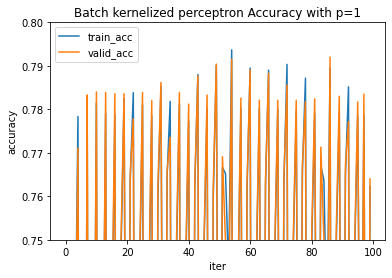

In [67]:
data = [[0.7085, 0.5046666666666667, 0.49533333333333335, 0.7165, 0.7783333333333333, 0.5076666666666667, 0.5938333333333333, 0.7813333333333333, 0.5118333333333334, 0.6751666666666667, 0.7815, 0.5145, 0.7018333333333333, 0.779, 0.5296666666666666, 0.7238333333333333, 0.7788333333333334, 0.5553333333333333, 0.7468333333333333, 0.7825, 0.633, 0.7636666666666667, 0.7838333333333334, 0.5466666666666666, 0.7398333333333333, 0.781, 0.5251666666666667, 0.735, 0.7785, 0.5771666666666667, 0.7598333333333334, 0.7851666666666667, 0.6406666666666667, 0.7648333333333334, 0.7818333333333334, 0.5503333333333333, 0.745, 0.7811666666666667, 0.5265, 0.7411666666666666, 0.7773333333333333, 0.6053333333333333, 0.7621666666666667, 0.788, 0.5376666666666666, 0.7486666666666667, 0.7801666666666667, 0.569, 0.7595, 0.7901666666666667, 0.655, 0.7666666666666667, 0.7651666666666667, 0.7423333333333333, 0.7936666666666666, 0.5083333333333333, 0.7375, 0.7801666666666667, 0.6186666666666667, 0.7616666666666667, 0.7895, 0.517, 0.7421666666666666, 0.7801666666666667, 0.6201666666666666, 0.7623333333333333, 0.789, 0.5196666666666667, 0.7461666666666666, 0.78, 0.631, 0.7633333333333333, 0.7903333333333333, 0.5161666666666667, 0.747, 0.7795, 0.6416666666666667, 0.7656666666666667, 0.7871666666666667, 0.5195, 0.7476666666666667, 0.7791666666666667, 0.6576666666666666, 0.767, 0.7636666666666667, 0.7271666666666666, 0.7895, 0.505, 0.7486666666666667, 0.7793333333333333, 0.647, 0.7648333333333334, 0.7851666666666667, 0.5111666666666667, 0.747, 0.7785, 0.6845, 0.7786666666666666, 0.6193333333333333, 0.7623333333333333],[0.7118, 0.5067, 0.4934, 0.7178, 0.7711, 0.5081, 0.5958, 0.7833, 0.5133, 0.6761, 0.784, 0.5155, 0.6998, 0.7839, 0.5282, 0.7258, 0.7836, 0.5537, 0.75, 0.7836, 0.6219, 0.7651, 0.7778, 0.5415, 0.7432, 0.7839, 0.5242, 0.7372, 0.782, 0.5732, 0.7625, 0.7862, 0.6232, 0.7658, 0.7736, 0.5427, 0.7479, 0.7839, 0.525, 0.7427, 0.7812, 0.5974, 0.7636, 0.7877, 0.535, 0.7495, 0.7833, 0.5585, 0.7619, 0.7904, 0.6362, 0.7691, 0.7493, 0.7291, 0.7915, 0.5081, 0.7391, 0.7826, 0.6101, 0.7632, 0.7891, 0.5174, 0.7448, 0.7821, 0.6072, 0.7638, 0.7883, 0.5197, 0.7478, 0.7821, 0.617, 0.7649, 0.7856, 0.5167, 0.749, 0.7821, 0.6278, 0.7672, 0.7818, 0.5196, 0.75, 0.7824, 0.6448, 0.7713, 0.7503, 0.7105, 0.792, 0.5064, 0.7516, 0.783, 0.6329, 0.7673, 0.7772, 0.513, 0.7489, 0.7817, 0.6685, 0.7835, 0.6005, 0.764]]
# p=1

numpy_array = np.array(data)
transpose = numpy_array.T

spar_data = pd.DataFrame(transpose,columns=['train_acc','valid_acc'])
spar_data.plot(title="Batch kernelized perceptron Accuracy with p=1",ylim=(0.75,0.80),xlabel="iter",ylabel="accuracy")


<AxesSubplot:title={'center':'Accuracy with p=2'}, xlabel='iter', ylabel='accuracy'>

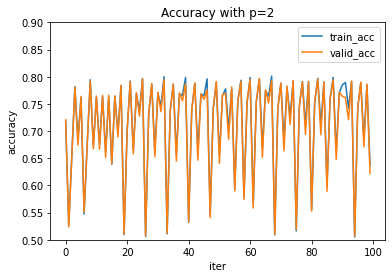

In [95]:
data = [[0.7188333333333333, 0.5268333333333334, 0.6543333333333333, 0.7816666666666666, 0.6845, 0.7618333333333334, 0.5475, 0.6743333333333333, 0.7945, 0.6731666666666667, 0.7628333333333334, 0.6748333333333333, 0.764, 0.6615, 0.7628333333333334, 0.6388333333333334, 0.7643333333333333, 0.6966666666666667, 0.7836666666666666, 0.5091666666666667, 0.701, 0.7921666666666667, 0.665, 0.7688333333333334, 0.737, 0.7968333333333333, 0.5058333333333334, 0.73, 0.7861666666666667, 0.6606666666666666, 0.7701666666666667, 0.7455, 0.8001666666666667, 0.5108333333333334, 0.7366666666666667, 0.7865, 0.657, 0.7681666666666667, 0.7658333333333334, 0.7986666666666666, 0.532, 0.7376666666666667, 0.7875, 0.6631666666666667, 0.7678333333333334, 0.7651666666666667, 0.7961666666666667, 0.5456666666666666, 0.7416666666666667, 0.7888333333333334, 0.6555, 0.765, 0.7776666666666666, 0.7041666666666667, 0.7771666666666667, 0.5935, 0.7551666666666667, 0.7935, 0.578, 0.7516666666666667, 0.7985, 0.566, 0.7531666666666667, 0.7963333333333333, 0.6691666666666667, 0.7745, 0.7641666666666667, 0.8011666666666667, 0.509, 0.7415, 0.7881666666666667, 0.6828333333333333, 0.78, 0.7271666666666666, 0.792, 0.5161666666666667, 0.7448333333333333, 0.7913333333333333, 0.7113333333333334, 0.7913333333333333, 0.5536666666666666, 0.7526666666666667, 0.797, 0.7103333333333334, 0.7903333333333333, 0.5981666666666666, 0.758, 0.7988333333333333, 0.661, 0.7705, 0.785, 0.7895, 0.7423333333333333, 0.7913333333333333, 0.5051666666666667, 0.7425, 0.7891666666666667, 0.6846666666666666, 0.7846666666666666, 0.6376666666666667],[0.7206, 0.5238, 0.6539, 0.7809, 0.6742, 0.7639, 0.5511, 0.6759, 0.7918, 0.6673, 0.7642, 0.6666, 0.7656, 0.6514, 0.766, 0.6402, 0.7643, 0.6891, 0.7843, 0.5101, 0.7028, 0.7911, 0.6582, 0.771, 0.7276, 0.7963, 0.5073, 0.7316, 0.7878, 0.653, 0.7713, 0.7356, 0.7944, 0.5122, 0.7378, 0.7862, 0.6447, 0.7704, 0.7557, 0.7872, 0.533, 0.7379, 0.7887, 0.6466, 0.7687, 0.7584, 0.7758, 0.5406, 0.741, 0.7913, 0.6407, 0.7672, 0.7692, 0.685, 0.7811, 0.5898, 0.7555, 0.7915, 0.5741, 0.7552, 0.795, 0.5585, 0.7552, 0.7966, 0.652, 0.7758, 0.7515, 0.7932, 0.5097, 0.7418, 0.788, 0.6637, 0.7829, 0.712, 0.7927, 0.5191, 0.7452, 0.7904, 0.694, 0.7913, 0.5531, 0.7553, 0.7959, 0.6932, 0.7899, 0.5891, 0.7599, 0.7944, 0.6478, 0.7715, 0.7641, 0.7616, 0.7209, 0.7922, 0.5071, 0.7421, 0.7901, 0.6709, 0.7864, 0.622]]
# p=2

numpy_array = np.array(data)
transpose = numpy_array.T

spar_data = pd.DataFrame(transpose,columns=['train_acc','valid_acc'])
spar_data.plot(title="Accuracy with p=2",ylim=(0.5,0.9),xlabel="iter",ylabel="accuracy")

<AxesSubplot:title={'center':'Accuracy with p=3'}, xlabel='iter', ylabel='accuracy'>

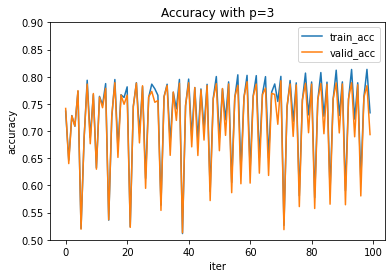

In [105]:
data = [[0.7365, 0.6466666666666666, 0.7285, 0.709, 0.7731666666666667, 0.521, 0.6865, 0.7935, 0.6881666666666667, 0.767, 0.6323333333333333, 0.7638333333333334, 0.7481666666666666, 0.7873333333333333, 0.5361666666666667, 0.7251666666666666, 0.7948333333333333, 0.6688333333333333, 0.7668333333333334, 0.7618333333333334, 0.7813333333333333, 0.5241666666666667, 0.7453333333333333, 0.789, 0.696, 0.7818333333333334, 0.613, 0.7621666666666667, 0.7863333333333333, 0.7778333333333334, 0.7658333333333334, 0.5638333333333333, 0.7633333333333333, 0.7861666666666667, 0.68, 0.7713333333333333, 0.741, 0.795, 0.5115, 0.7461666666666666, 0.7956666666666666, 0.6905, 0.78, 0.685, 0.7775, 0.7048333333333333, 0.786, 0.5891666666666666, 0.7603333333333333, 0.8003333333333333, 0.6876666666666666, 0.7776666666666666, 0.7208333333333333, 0.7905, 0.6055, 0.7606666666666667, 0.8035, 0.6271666666666667, 0.7618333333333334, 0.8025, 0.6296666666666667, 0.7646666666666667, 0.802, 0.6511666666666667, 0.7678333333333334, 0.8001666666666667, 0.6506666666666666, 0.7716666666666666, 0.7866666666666666, 0.7545, 0.8006666666666666, 0.5266666666666666, 0.7433333333333333, 0.793, 0.7176666666666667, 0.7886666666666666, 0.581, 0.757, 0.8066666666666666, 0.7298333333333333, 0.7903333333333333, 0.5775, 0.7563333333333333, 0.8076666666666666, 0.7273333333333334, 0.79, 0.5898333333333333, 0.7585, 0.812, 0.7286666666666667, 0.7905, 0.5903333333333334, 0.7583333333333333, 0.8133333333333334, 0.722, 0.7888333333333334, 0.6106666666666667, 0.7621666666666667, 0.8135, 0.7336666666666667],[0.7416, 0.6402, 0.7281, 0.7092, 0.7744, 0.5195, 0.6888, 0.7864, 0.6767, 0.7691, 0.6299, 0.7625, 0.743, 0.7787, 0.5369, 0.7289, 0.789, 0.6516, 0.7662, 0.7493, 0.7661, 0.5229, 0.7454, 0.7882, 0.6783, 0.7834, 0.5947, 0.7628, 0.773, 0.753, 0.7561, 0.5541, 0.763, 0.7838, 0.6554, 0.7719, 0.7197, 0.788, 0.513, 0.7477, 0.7889, 0.671, 0.7801, 0.6551, 0.7759, 0.6835, 0.7839, 0.5722, 0.7592, 0.7872, 0.6639, 0.7783, 0.6921, 0.7866, 0.5867, 0.7625, 0.7841, 0.6031, 0.7624, 0.7908, 0.6043, 0.7641, 0.7865, 0.6226, 0.767, 0.779, 0.6184, 0.7694, 0.7674, 0.7125, 0.7926, 0.5187, 0.7457, 0.7867, 0.6902, 0.7849, 0.5611, 0.7576, 0.7878, 0.697, 0.7864, 0.5576, 0.7576, 0.7874, 0.6951, 0.7861, 0.5655, 0.7592, 0.7885, 0.6966, 0.7867, 0.5645, 0.7593, 0.7889, 0.6895, 0.7852, 0.5807, 0.7616, 0.7836, 0.6936]]
# p=3

numpy_array = np.array(data)
transpose = numpy_array.T

spar_data = pd.DataFrame(transpose,columns=['train_acc','valid_acc'])
spar_data.plot(title="Accuracy with p=3",ylim=(0.5,0.9),xlabel="iter",ylabel="accuracy")

<AxesSubplot:title={'center':'Accuracy with p=4'}, xlabel='iter', ylabel='accuracy'>

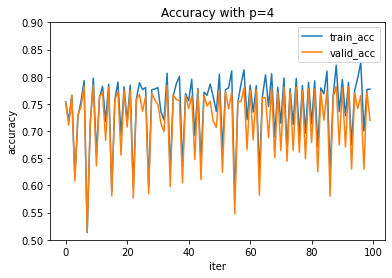

In [103]:
data = [[0.7538333333333334, 0.7191666666666666, 0.7658333333333334, 0.6148333333333333, 0.7273333333333334, 0.7546666666666667, 0.7928333333333333, 0.5133333333333333, 0.7141666666666666, 0.7975, 0.657, 0.7618333333333334, 0.7823333333333333, 0.7178333333333333, 0.7861666666666667, 0.5896666666666667, 0.7585, 0.79, 0.6923333333333334, 0.7815, 0.7181666666666666, 0.7841666666666667, 0.5946666666666667, 0.7588333333333334, 0.789, 0.7765, 0.78, 0.598, 0.7758333333333334, 0.7775, 0.78, 0.7353333333333333, 0.7201666666666666, 0.8063333333333333, 0.6255, 0.7648333333333334, 0.7871666666666667, 0.8006666666666666, 0.6338333333333334, 0.769, 0.7555, 0.7951666666666667, 0.692, 0.7781666666666667, 0.643, 0.7713333333333333, 0.766, 0.7865, 0.7628333333333334, 0.7363333333333333, 0.8046666666666666, 0.6636666666666666, 0.7763333333333333, 0.7795, 0.8106666666666666, 0.576, 0.7526666666666667, 0.7853333333333333, 0.8126666666666666, 0.721, 0.7845, 0.7351666666666666, 0.7836666666666666, 0.6226666666666667, 0.764, 0.8033333333333333, 0.7451666666666666, 0.8055, 0.6893333333333334, 0.7806666666666666, 0.7143333333333334, 0.7976666666666666, 0.6678333333333333, 0.7781666666666667, 0.7121666666666666, 0.7968333333333333, 0.6913333333333334, 0.7838333333333334, 0.6963333333333334, 0.7895, 0.713, 0.7926666666666666, 0.6705, 0.7793333333333333, 0.7685, 0.8103333333333333, 0.6231666666666666, 0.7636666666666667, 0.8211666666666667, 0.7358333333333333, 0.795, 0.7285, 0.7893333333333333, 0.6745, 0.7748333333333334, 0.7975, 0.8265, 0.7, 0.7766666666666666, 0.7771666666666667],[0.7529, 0.7109, 0.7657, 0.608, 0.7302, 0.7448, 0.782, 0.5158, 0.7175, 0.7848, 0.6358, 0.7628, 0.7713, 0.6829, 0.7806, 0.5807, 0.7587, 0.7722, 0.6559, 0.7744, 0.7073, 0.7747, 0.5768, 0.7589, 0.7671, 0.7366, 0.7637, 0.5845, 0.7693, 0.7575, 0.7488, 0.7136, 0.6991, 0.7836, 0.5981, 0.7661, 0.7579, 0.7564, 0.6049, 0.7654, 0.741, 0.7644, 0.6477, 0.7749, 0.6109, 0.7664, 0.7461, 0.7547, 0.7183, 0.7067, 0.7757, 0.624, 0.7719, 0.7407, 0.7717, 0.5477, 0.755, 0.7541, 0.7794, 0.666, 0.7752, 0.6835, 0.7757, 0.5819, 0.7613, 0.7616, 0.6878, 0.7796, 0.6512, 0.7708, 0.6643, 0.78, 0.6445, 0.772, 0.664, 0.7809, 0.6612, 0.7746, 0.6491, 0.7778, 0.6791, 0.7774, 0.6252, 0.7723, 0.7201, 0.7745, 0.5802, 0.7621, 0.7823, 0.6748, 0.7798, 0.6707, 0.7812, 0.6303, 0.7697, 0.7415, 0.7656, 0.6298, 0.7716, 0.72]]
# p=4

numpy_array = np.array(data)
transpose = numpy_array.T

spar_data = pd.DataFrame(transpose,columns=['train_acc','valid_acc'])
spar_data.plot(title="Accuracy with p=4",ylim=(0.5,0.9),xlabel="iter",ylabel="accuracy")

<AxesSubplot:title={'center':'Accuracy with p=5'}, xlabel='iter', ylabel='accuracy'>

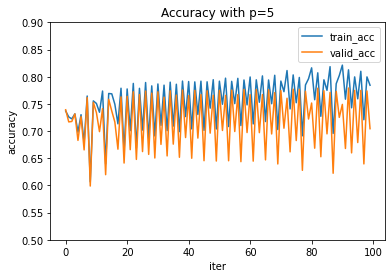

In [107]:
data = [[0.737, 0.726, 0.7225, 0.7316666666666667, 0.698, 0.7301666666666666, 0.679, 0.7645, 0.6066666666666667, 0.7555, 0.7508333333333334, 0.7346666666666667, 0.7736666666666666, 0.6396666666666667, 0.7691666666666667, 0.7685, 0.7493333333333333, 0.7133333333333334, 0.7788333333333334, 0.6638333333333334, 0.7775, 0.7008333333333333, 0.7876666666666666, 0.6686666666666666, 0.7786666666666666, 0.7018333333333333, 0.7893333333333333, 0.6863333333333334, 0.7831666666666667, 0.691, 0.7866666666666666, 0.7105, 0.7845, 0.7008333333333333, 0.79, 0.7091666666666666, 0.7861666666666667, 0.699, 0.792, 0.7266666666666667, 0.7911666666666667, 0.704, 0.7905, 0.7305, 0.7918333333333333, 0.7013333333333334, 0.7906666666666666, 0.7421666666666666, 0.7945, 0.7038333333333333, 0.7918333333333333, 0.7493333333333333, 0.7973333333333333, 0.7083333333333334, 0.7915, 0.7505, 0.797, 0.7101666666666666, 0.794, 0.7481666666666666, 0.7995, 0.7131666666666666, 0.7943333333333333, 0.753, 0.8015, 0.7175, 0.794, 0.7503333333333333, 0.8026666666666666, 0.7028333333333333, 0.792, 0.7725, 0.8113333333333334, 0.7408333333333333, 0.8033333333333333, 0.7521666666666667, 0.7986666666666666, 0.6913333333333334, 0.7848333333333334, 0.7963333333333333, 0.8163333333333334, 0.7576666666666667, 0.8071666666666667, 0.7271666666666666, 0.7943333333333333, 0.775, 0.8185, 0.6956666666666667, 0.7871666666666667, 0.8021666666666667, 0.8213333333333334, 0.7586666666666667, 0.8126666666666666, 0.7428333333333333, 0.7996666666666666, 0.7593333333333333, 0.81, 0.7208333333333333, 0.7996666666666666, 0.7843333333333333],[0.7392, 0.7169, 0.7177, 0.7316, 0.6829, 0.7267, 0.6654, 0.7617, 0.5989, 0.7529, 0.7339, 0.699, 0.7413, 0.6198, 0.7584, 0.7368, 0.7165, 0.6667, 0.7629, 0.6412, 0.764, 0.6658, 0.7723, 0.6479, 0.7672, 0.6623, 0.7736, 0.6571, 0.7698, 0.6505, 0.7722, 0.6755, 0.7623, 0.6543, 0.7741, 0.676, 0.7662, 0.6518, 0.7756, 0.6881, 0.7654, 0.65, 0.7749, 0.6871, 0.7672, 0.6455, 0.7742, 0.6962, 0.7659, 0.6449, 0.7748, 0.7011, 0.7657, 0.6454, 0.7754, 0.6992, 0.7672, 0.6437, 0.7765, 0.6973, 0.7671, 0.6447, 0.7763, 0.6971, 0.7672, 0.647, 0.7761, 0.6947, 0.7708, 0.6395, 0.7745, 0.7053, 0.7604, 0.6618, 0.7772, 0.6826, 0.7768, 0.6278, 0.7732, 0.7222, 0.7516, 0.6685, 0.7789, 0.6528, 0.7742, 0.6949, 0.7711, 0.6224, 0.7731, 0.7252, 0.7491, 0.668, 0.7792, 0.6599, 0.7749, 0.6789, 0.7749, 0.6396, 0.7738, 0.7044]]
# p=5

numpy_array = np.array(data)
transpose = numpy_array.T

spar_data = pd.DataFrame(transpose,columns=['train_acc','valid_acc'])
spar_data.plot(title="Accuracy with p=5",ylim=(0.5,0.9),xlabel="iter",ylabel="accuracy")

In [35]:
lst.pop(0)

10

In [36]:
lst

[20, 30, 40]

In [37]:
lst.insert(0,10)

In [38]:
lst

[10, 20, 30, 40]

In [39]:
lst.append(50)

In [40]:
lst

[10, 20, 30, 40, 50]

In [43]:
lst.reverse()

In [44]:
alpha_expand = np.expand_dims(alpha, axis=0)
alpha_expand = np.repeat(alpha_expand,repeats=k_matrix.shape[0],axis=0)
u = np.sum((alpha_predict*k_matrix*yn_predict),axis=1)
u = u * yn
print(u)
alpha_temp = np.where(u<=0,1,0)
print(u)

[10, 20, 30, 40, 50]

In [51]:
a = np.array([[1,2],[3,4]])

In [52]:
a

array([[1, 2],
       [3, 4]])

In [54]:
np.sum(a,axis=1)

array([3, 7])

# part2b(b)

In [74]:
table = pd.read_csv('IA2-train.csv')
table2 = pd.read_csv('IA2-dev.csv')

# table2
x_sum = pd.concat([table,table2])
x_sum = x_sum.reset_index(drop=True)

xi = x_sum.iloc[:5000,:197]


alpha = pd.Series(0, index=list(range(xi.shape[0])),dtype='int')
alpha_temp = pd.Series(0, index=list(range(xi.shape[0])),dtype='int')

# set hyperparameter
maxiter = 100
p = 1


predict_acc_list = []
predict_val_acc_list = []
run_time = {}

# normalizaion (age, annual_premium, vintage)
mean = []
std = []

mean.append(xi.loc[:,"Age"].mean())
std.append(xi.loc[:,"Age"].std())

mean.append(xi.loc[:,"Annual_Premium"].mean())
std.append(xi.loc[:,"Annual_Premium"].std())

mean.append(xi.loc[:,"Vintage"].mean())
std.append(xi.loc[:,"Vintage"].std())

xi.loc[:,"Age"] = (xi.loc[:,"Age"] - xi.loc[:,"Age"].mean()) / xi.loc[:,"Age"].std()
xi.loc[:,"Annual_Premium"] = (xi.loc[:,"Annual_Premium"] - xi.loc[:,"Annual_Premium"].mean()) / xi.loc[:,"Annual_Premium"].std()
xi.loc[:,"Vintage"] = (xi.loc[:,"Vintage"] - xi.loc[:,"Vintage"].mean()) / xi.loc[:,"Vintage"].std()


# result y
y = x_sum.loc[:4999,['Response']]
y = y.replace(0,-1)
yn = y['Response'].to_numpy()
y_result = y['Response'].values.tolist()

# for prediction
yn_predict = np.expand_dims(yn, axis=0)
yn_predict = np.repeat(yn_predict,repeats=xi.shape[0],axis=0)


# compute kernel matrix
k_matrix = np.power(np.dot(xi.to_numpy(),xi.to_numpy().T),p)


start_time = time.time()
for itr in range(maxiter):
    
    alpha_expand = np.repeat(np.expand_dims(alpha, axis=0),repeats=k_matrix.shape[0],axis=0)
    u = np.sum((alpha_expand*k_matrix*yn_predict),axis=1)* yn
    alpha_temp = np.where(u<=0,1,0)
    alpha += alpha_temp

    alpha_predict = np.repeat(np.expand_dims(alpha, axis=0),repeats=k_matrix.shape[0],axis=0)

    prediction = np.where(np.sum((alpha_predict*k_matrix*yn_predict),axis=1)>=0,1,-1)
    
    count = np.sum(np.where((prediction - y_result)==0,1,0))

    predict_acc = count / len(prediction)
    print("\n\n========", itr,"th predicted training accuracy========")
    print(predict_acc)
    predict_acc_list.append(predict_acc) 

    
run_time['batch perceptron'] = time.time() - start_time

print(predict_acc_list)
print(predict_val_acc_list)
print("Learning time:\n")
print(run_time['batch perceptron'])




======== 0 th predicted training accuracy========
0.7114


======== 1 th predicted training accuracy========
0.503


======== 2 th predicted training accuracy========
0.497


======== 3 th predicted training accuracy========
0.7346


======== 4 th predicted training accuracy========
0.7282


======== 5 th predicted training accuracy========
0.7846


======== 6 th predicted training accuracy========
0.503


======== 7 th predicted training accuracy========
0.6584


======== 8 th predicted training accuracy========
0.78


======== 9 th predicted training accuracy========
0.5048


======== 10 th predicted training accuracy========
0.6656


======== 11 th predicted training accuracy========
0.7822


======== 12 th predicted training accuracy========
0.5112


======== 13 th predicted training accuracy========
0.691


======== 14 th predicted training accuracy========
0.7812


======== 15 th predicted training accuracy========
0.53


======== 16 th predicted training accuracy========
0.714

<AxesSubplot:title={'center':'Accuracy with p=1'}, xlabel='iter', ylabel='accuracy'>

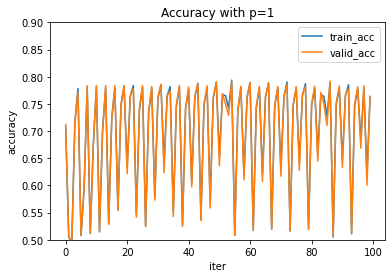

In [75]:
data = [[0.7085, 0.5046666666666667, 0.49533333333333335, 0.7165, 0.7783333333333333, 0.5076666666666667, 0.5938333333333333, 0.7813333333333333, 0.5118333333333334, 0.6751666666666667, 0.7815, 0.5145, 0.7018333333333333, 0.779, 0.5296666666666666, 0.7238333333333333, 0.7788333333333334, 0.5553333333333333, 0.7468333333333333, 0.7825, 0.633, 0.7636666666666667, 0.7838333333333334, 0.5466666666666666, 0.7398333333333333, 0.781, 0.5251666666666667, 0.735, 0.7785, 0.5771666666666667, 0.7598333333333334, 0.7851666666666667, 0.6406666666666667, 0.7648333333333334, 0.7818333333333334, 0.5503333333333333, 0.745, 0.7811666666666667, 0.5265, 0.7411666666666666, 0.7773333333333333, 0.6053333333333333, 0.7621666666666667, 0.788, 0.5376666666666666, 0.7486666666666667, 0.7801666666666667, 0.569, 0.7595, 0.7901666666666667, 0.655, 0.7666666666666667, 0.7651666666666667, 0.7423333333333333, 0.7936666666666666, 0.5083333333333333, 0.7375, 0.7801666666666667, 0.6186666666666667, 0.7616666666666667, 0.7895, 0.517, 0.7421666666666666, 0.7801666666666667, 0.6201666666666666, 0.7623333333333333, 0.789, 0.5196666666666667, 0.7461666666666666, 0.78, 0.631, 0.7633333333333333, 0.7903333333333333, 0.5161666666666667, 0.747, 0.7795, 0.6416666666666667, 0.7656666666666667, 0.7871666666666667, 0.5195, 0.7476666666666667, 0.7791666666666667, 0.6576666666666666, 0.767, 0.7636666666666667, 0.7271666666666666, 0.7895, 0.505, 0.7486666666666667, 0.7793333333333333, 0.647, 0.7648333333333334, 0.7851666666666667, 0.5111666666666667, 0.747, 0.7785, 0.6845, 0.7786666666666666, 0.6193333333333333, 0.7623333333333333],[0.7118, 0.5067, 0.4934, 0.7178, 0.7711, 0.5081, 0.5958, 0.7833, 0.5133, 0.6761, 0.784, 0.5155, 0.6998, 0.7839, 0.5282, 0.7258, 0.7836, 0.5537, 0.75, 0.7836, 0.6219, 0.7651, 0.7778, 0.5415, 0.7432, 0.7839, 0.5242, 0.7372, 0.782, 0.5732, 0.7625, 0.7862, 0.6232, 0.7658, 0.7736, 0.5427, 0.7479, 0.7839, 0.525, 0.7427, 0.7812, 0.5974, 0.7636, 0.7877, 0.535, 0.7495, 0.7833, 0.5585, 0.7619, 0.7904, 0.6362, 0.7691, 0.7493, 0.7291, 0.7915, 0.5081, 0.7391, 0.7826, 0.6101, 0.7632, 0.7891, 0.5174, 0.7448, 0.7821, 0.6072, 0.7638, 0.7883, 0.5197, 0.7478, 0.7821, 0.617, 0.7649, 0.7856, 0.5167, 0.749, 0.7821, 0.6278, 0.7672, 0.7818, 0.5196, 0.75, 0.7824, 0.6448, 0.7713, 0.7503, 0.7105, 0.792, 0.5064, 0.7516, 0.783, 0.6329, 0.7673, 0.7772, 0.513, 0.7489, 0.7817, 0.6685, 0.7835, 0.6005, 0.764]]
# p=1

numpy_array = np.array(data)
transpose = numpy_array.T

spar_data = pd.DataFrame(transpose,columns=['train_acc','valid_acc'])
spar_data.plot(title="Accuracy with p=1",ylim=(0.5,0.9),xlabel="iter",ylabel="accuracy")


<AxesSubplot:title={'center':'empirical runtime as a function of N'}, xlabel='N size', ylabel='run time'>

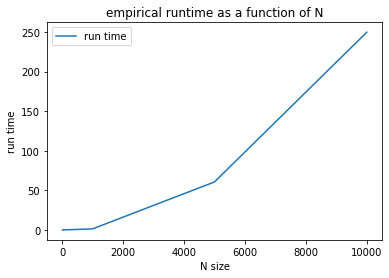

In [75]:
data = [0.0315699577331543,0.11534404754638672,1.3420789241790771,60.55628299713135,249.5830421447754]
# learining time

numpy_array = np.array(data)
transpose = numpy_array.T

spar_data = pd.DataFrame(transpose,columns=['run time'],index=[10,100,1000,5000,10000])
spar_data.plot(title="empirical runtime as a function of N",xlabel="N size",ylabel="run time")

<AxesSubplot:title={'center':'empirical runtime as a function of N'}, xlabel='N size', ylabel='run time'>

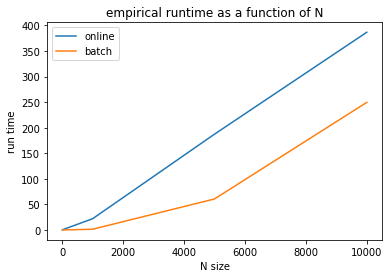

In [79]:
data = [[0.24178004264831543,2.296732187271118,21.87843894958496,187.28013014793396,386.7425501346588],[0.0315699577331543,0.11534404754638672,1.3420789241790771,60.55628299713135,249.5830421447754]]
# learining time

numpy_array = np.array(data)
transpose = numpy_array.T

spar_data = pd.DataFrame(transpose,columns=['online','batch'],index=[10,100,1000,5000,10000])
spar_data.plot(title="empirical runtime as a function of N",xlabel="N size",ylabel="run time")